# <span style="color:#3366ff"> <strong> Analyse Nutritionnelle Arnaud ROUSSEAU </strong>

# <span style="color:#3366ff"> 21 Avril 2018 - Part 2 Cleanée

## Importation des librairies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sea

import scipy.stats as st

import operator

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import neighbors
from sklearn import metrics

## Chargement de la base cleanée

In [2]:
data_nutri_light = pd.read_csv(
    'Data_Food_Clean_dropna.csv', 
    sep='\t', 
    encoding='utf-8', 
    low_memory = False)
pd.options.display.max_columns=50
data_nutri_light.head().T

,0,1,2,3,4
code,0000000004530,0000000004559,0000000016087,0000000016124,0000000016872
product_name,Banana Chips Sweetened (Whole),Peanuts,Organic Salted Nut Mix,Organic Muesli,Zen Party Mix
additives_n,0,0,0,2,1
ingredients_from_palm_oil_n,0,0,0,0,0
ingredients_that_may_be_from_palm_oil_n,0,0,0,0,0
nutrition_grade_fr,d,b,d,c,d
energy_100g,2243,1941,2540,1833,2230
proteins_100g,3.57,17.86,17.86,14.06,16.67
carbohydrates_100g,64.29,60.71,17.86,57.81,36.67
sugars_100g,14.29,17.86,3.57,15.62,3.33


In [3]:
# Cette base light base mesure
shape = data_nutri_light.shape
shape

print("Cette base de données light contient",shape[0], 
      "produits décrits avec", shape[1], "paramètres.")

Cette base de données light contient 170540 produits décrits avec 16 paramètres.


<span style="color:#3366ff"> Après la phase de cleaning 16 paramètres ont été conservés:
    
<span style="color:#3366ff"> Les 2 premiers pour l'identification des produits: code et product_name;
    
<span style="color:#3366ff"> Les 12 champs suivants seront étudiés:   
<span style="color:#3366ff"> - energy_100g, </span>    
<span style="color:#3366ff"> - proteins_100g, </span>     
<span style="color:#3366ff"> - sugars_100g, </span>      
<span style="color:#3366ff"> - fat_100g, </span>      
<span style="color:#3366ff"> - saturated-fat_100g,</span>     
<span style="color:#3366ff"> - fiber_100g,</span>   
<span style="color:#3366ff"> - salt_100g, </span>      
<span style="color:#3366ff"> - ingredients_from_palm_oil_n, </span>     
<span style="color:#3366ff"> - ingredients_that_may_be_from_palm_oil_n, </span>     
<span style="color:#3366ff"> - additives_n,  </span>         
<span style="color:#3366ff"> - carbohydrates_100g, </span>      
<span style="color:#3366ff"> - sodium_100g.</span>  


<span style="color:#3366ff"> Ils vont nous permettre grace à des algorithmes de machine learning, de prédire les valeurs des paramètres <strong> "nutrition-score-fr_100g" </strong>  et <strong> "nutrition_grade_fr" </strong> , qui sont des indicateurs de la valeurs nutrionnelles des aliments.

# Analyse univariée: description, données aberrantes ...

### Description Sucres

In [4]:
data_nutri_light['sugars_100g'].describe(include='all')

count    170540.000000
mean         14.989007
std          19.417548
min         -17.860000
25%           1.500000
50%           5.300000
75%          23.330000
max         134.000000
Name: sugars_100g, dtype: float64

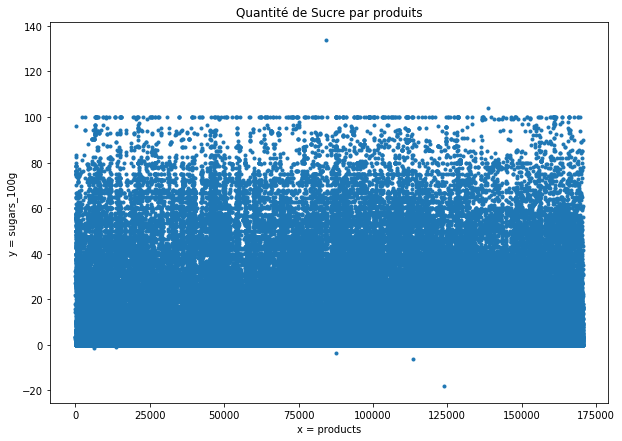

In [5]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Sucre par produits')
plt.ylabel("y = sugars_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['sugars_100g'], ".", )

<span style="color:#3366ff"> 
Il y a quelques données abérrantes (min et max ).  
Les valeurs infèrieures à zéro seront remplacées par 0 & les valeurs supérieures à 100 par 100.
</span>

In [6]:
data_nutri_light['sugars_100g'] = data_nutri_light['sugars_100g'].clip(0,100) 

In [7]:
data_nutri_light['sugars_100g'].describe(include='all')

count    170540.000000
mean         14.988958
std          19.416205
min           0.000000
25%           1.500000
50%           5.300000
75%          23.330000
max         100.000000
Name: sugars_100g, dtype: float64

<span style="color:#3366ff"> Suite au clippage, la moyenne n'a pas bougée (14.98 gr).

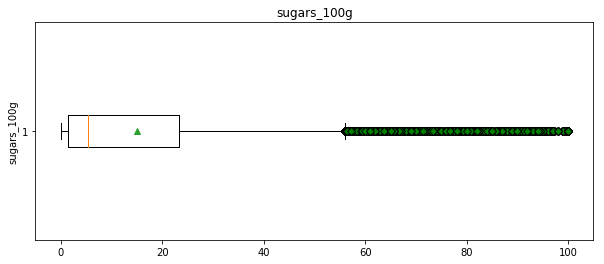

In [8]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('sugars_100g')
plt.ylabel("sugars_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['sugars_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

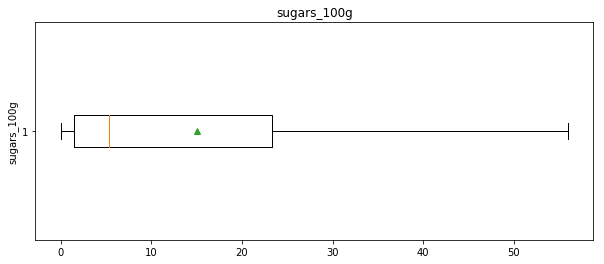

In [9]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('sugars_100g')
plt.ylabel("sugars_100g")

plt.boxplot(data_nutri_light['sugars_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion:</strong>  75% de la quantité de sucre renseignée dans la base à une valeure comprise entre 0 et 20 grammes, pour une moyenne de 15 gr.

### Description Saturated Fat

In [10]:
data_nutri_light['saturated-fat_100g'].describe(include='all')

count    170540.000000
mean          4.636998
std           6.979868
min           0.000000
25%           0.000000
50%           1.670000
75%           6.820000
max         210.000000
Name: saturated-fat_100g, dtype: float64

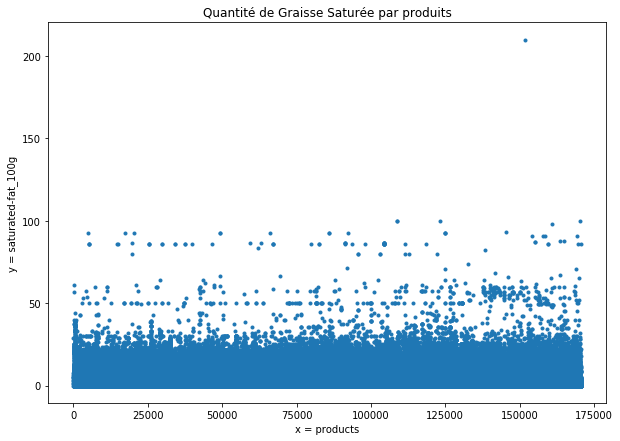

In [11]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Graisse Saturée par produits')
plt.ylabel("y = saturated-fat_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['saturated-fat_100g'], ".")

<span style="color:#3366ff"> 
Il y a quelques données abérrantes (max).
Les valeurs supérieures à 100 seront remplacées par 100.

In [12]:
data_nutri_light['saturated-fat_100g'] = data_nutri_light['saturated-fat_100g'].clip(0,100) 

In [13]:
data_nutri_light['saturated-fat_100g'].describe(include='all')

count    170540.000000
mean          4.636353
std           6.965959
min           0.000000
25%           0.000000
50%           1.670000
75%           6.820000
max         100.000000
Name: saturated-fat_100g, dtype: float64

<span style="color:#3366ff"> La moyenne n'a pas changée après clippage (4.63 gr).

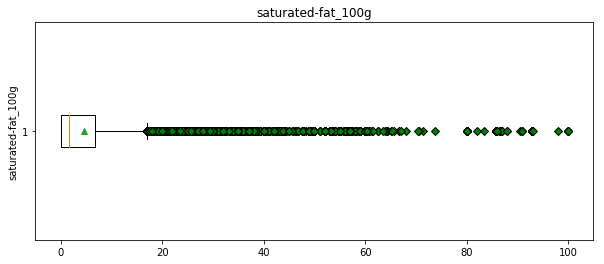

In [14]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('saturated-fat_100g')
plt.ylabel("saturated-fat_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['saturated-fat_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

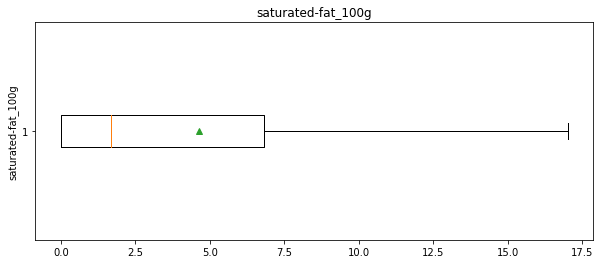

In [15]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('saturated-fat_100g')
plt.ylabel("saturated-fat_100g")

plt.boxplot(data_nutri_light['saturated-fat_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion: </strong> 75% de la quantité de graisse saturée renseignée dans la base à une valeure comprise entre entre 0 et 7 grammes, avec une moyenne de 4.63 gr.

### Description Fat

In [16]:
data_nutri_light['fat_100g'].describe(include='all')

count    170540.000000
mean         13.034637
std          15.670989
min           0.000000
25%           0.810000
50%           7.030000
75%          21.430000
max         380.000000
Name: fat_100g, dtype: float64

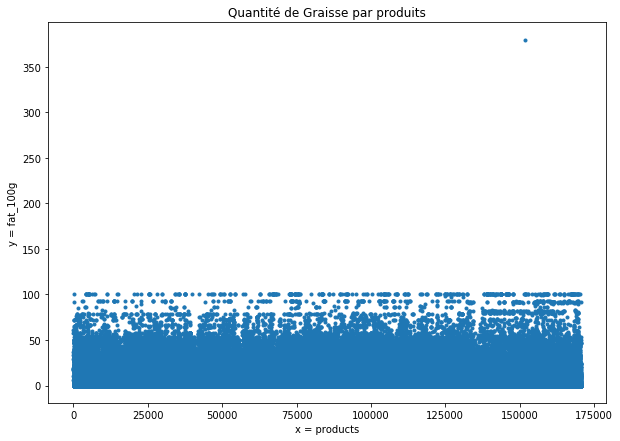

In [17]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Graisse par produits')
plt.ylabel("y = fat_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['fat_100g'], ".")

<span style="color:#3366ff"> 
Il y a quelques données abérrantes (max). Les valeurs supérieures à 100 seront remplacées par 100.

In [18]:
data_nutri_light['fat_100g'] = data_nutri_light['fat_100g'].clip(0,100) 

In [19]:
data_nutri_light['fat_100g'].describe(include='all')

count    170540.000000
mean         13.032995
std          15.647192
min           0.000000
25%           0.810000
50%           7.030000
75%          21.430000
max         100.000000
Name: fat_100g, dtype: float64

<span style="color:#3366ff"> Après clippage, la moyenne de la quantité de Graisse est toujours de 13.03 gr.

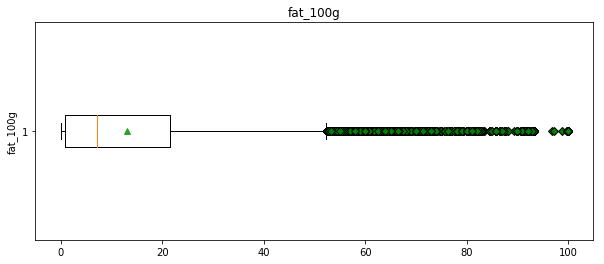

In [20]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('fat_100g')
plt.ylabel("fat_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['fat_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

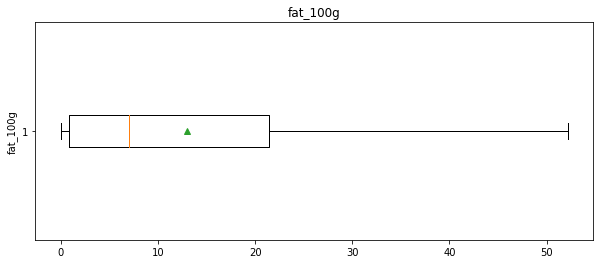

In [21]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('fat_100g')
plt.ylabel("fat_100g")

plt.boxplot(data_nutri_light['fat_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion: </strong>  75% de la quantité de Graisse renseignée dans la base de donnée se trouve entre 0 et 21.4 grammes, avec une moyenne de 13.03 gr. 

### Description Energy

In [22]:
data_nutri_light['energy_100g'].describe(include='all')

count    1.705400e+05
mean     1.207037e+03
std      7.906963e+03
min      0.000000e+00
25%      4.520000e+02
50%      1.219000e+03
75%      1.745000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

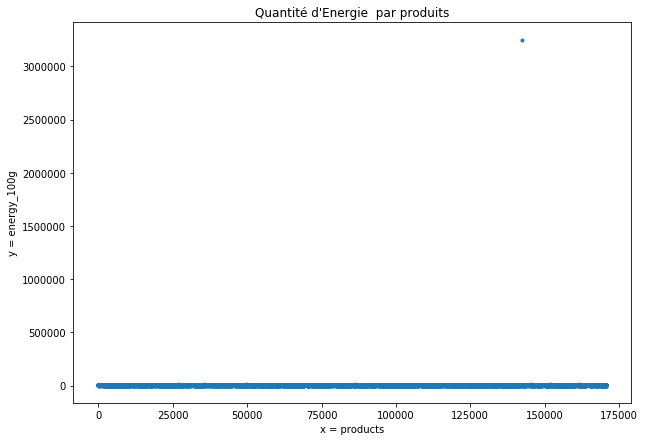

In [23]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title("Quantité d'Energie  par produits")
plt.ylabel("y = energy_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['energy_100g'], ".", )

<span style="color:#3366ff"> Il y a un outlier d'une valeur de <strong> 3.251373e+06 KJoules </strong> qui modifie la valeure de la moyenne (Pour Info: les apports en énergie doivent être de 10900 et 8400 kJ (respectivement pour Homme / Femme), par jour, pour une activité physique normale.)
    
<span style="color:#3366ff"> Cet outlier d'une valeur extrème sera remplacé par la valeur médiane.    

In [24]:
nrj_mediane = data_nutri_light['energy_100g'].median()
nrj_mediane

1219.0

In [25]:
# max_nrj = 3251373
ind_max_nrj = data_nutri_light['energy_100g'].idxmax()
ind_max_nrj

142307

In [26]:
data_nutri_light['energy_100g'][ind_max_nrj] = nrj_mediane

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
data_nutri_light['energy_100g'].describe(include='all')

count    170540.000000
mean       1187.979421
std         759.862292
min           0.000000
25%         452.000000
50%        1219.000000
75%        1745.000000
max       18700.000000
Name: energy_100g, dtype: float64

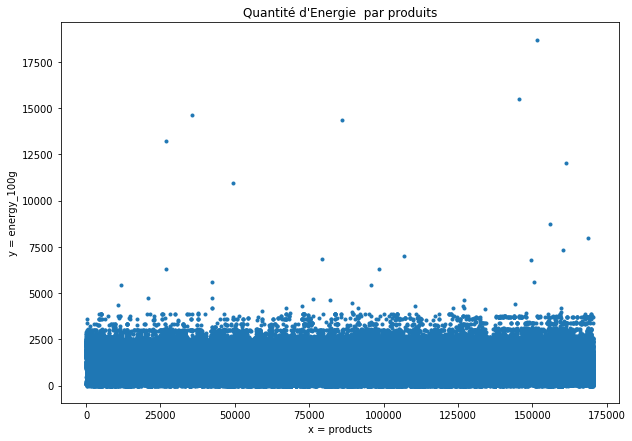

In [28]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title("Quantité d'Energie  par produits")
plt.ylabel("y = energy_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['energy_100g'], ".", )

<span style="color:#3366ff"> Il y a encore plusieurs outliers, de valeurs plus faibles que le précédant, mais avec des valeurs encore beaucoup trop élevées. Ceux ci seront clippés à 4000kJ (il n'y a pas d'aliments plus riches que l'huile d'avocat, l'huile de colza, l'huile de foie de morue, l'huile de noisette	... qui sont à 900KCal = environ 4000 KJ).

<span style="color:#3366ff">

In [29]:
data_nutri_light['energy_100g'] = data_nutri_light['energy_100g'].clip(0,4000) 

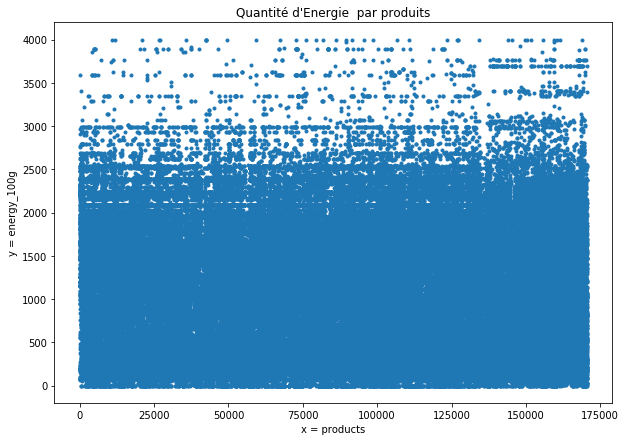

In [30]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title("Quantité d'Energie  par produits")
plt.ylabel("y = energy_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['energy_100g'], ".", )

In [31]:
data_nutri_light['energy_100g'] = data_nutri_light['energy_100g'].clip(0,5000) 

In [32]:
data_nutri_light['energy_100g'].describe(include='all')

count    170540.000000
mean       1187.336762
std         754.130552
min           0.000000
25%         452.000000
50%        1219.000000
75%        1745.000000
max        4000.000000
Name: energy_100g, dtype: float64

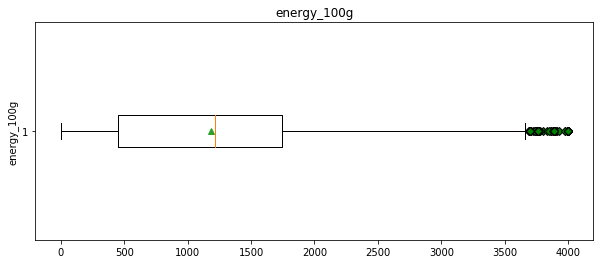

In [33]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('energy_100g')
plt.ylabel("energy_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['energy_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

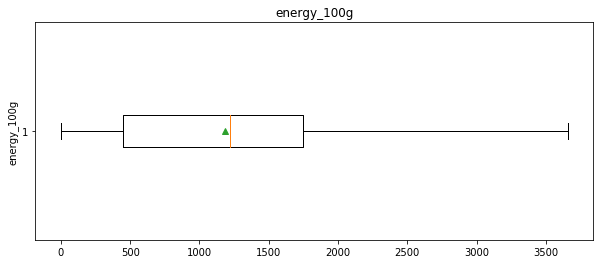

In [34]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('energy_100g')
plt.ylabel("energy_100g")

plt.boxplot(data_nutri_light['energy_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion: </strong> 75% de l'Energie renseignée dans la base de donnée se trouve entre 0 et 1745 kJoules, avec une moyenne à 1187.5 kJ.

### Description Proteines

In [35]:
data_nutri_light['proteins_100g'].describe(include='all') 

count    170540.000000
mean          7.752960
std           7.955402
min          -3.570000
25%           2.100000
50%           5.690000
75%          10.710000
max         100.000000
Name: proteins_100g, dtype: float64

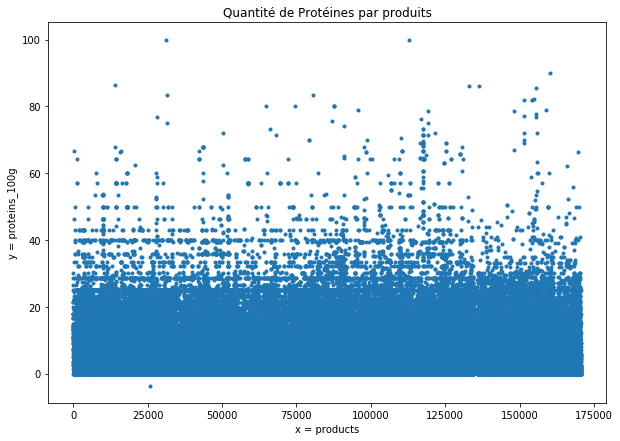

In [36]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Protéines par produits')
plt.ylabel("y = proteins_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['proteins_100g'], ".")

<span style="color:#3366ff"> Il y a une donnée abérante (masse négative) qui sera clippé à zéro.

In [37]:
data_nutri_light['proteins_100g'] = data_nutri_light['proteins_100g'].clip(0,100) 

In [38]:
data_nutri_light['proteins_100g'].describe(include='all') 

count    170540.000000
mean          7.752981
std           7.955377
min           0.000000
25%           2.100000
50%           5.690000
75%          10.710000
max         100.000000
Name: proteins_100g, dtype: float64

<span style="color:#3366ff"> Après clippage, la moyenne n'a pas changée, 7.75 gr.

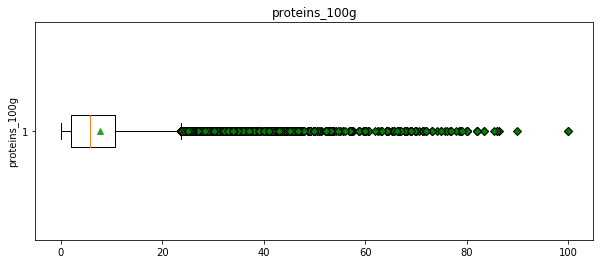

In [39]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('proteins_100g')
plt.ylabel("proteins_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['proteins_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

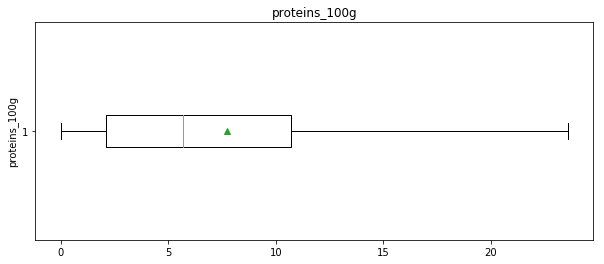

In [40]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('proteins_100g')
plt.ylabel("proteins_100g")

plt.boxplot(data_nutri_light['proteins_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion:</strong>  75% de la quantité de Protéines renseignée dans la base de donnée se trouve entre 0 et 10.71 grammes, avec une moyenne de 7.75 gr.

### Description Fiber

In [41]:
data_nutri_light['fiber_100g'].describe(include='all')

count    170540.000000
mean          2.864982
std           4.402922
min           0.000000
25%           0.000000
50%           1.600000
75%           3.600000
max         178.000000
Name: fiber_100g, dtype: float64

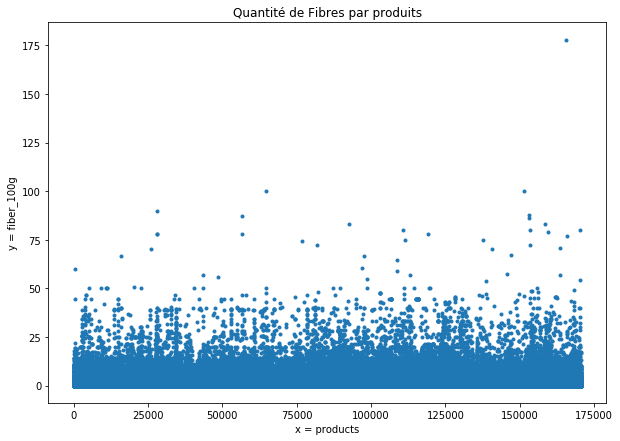

In [42]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Fibres par produits')
plt.ylabel("y = fiber_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['fiber_100g'], ".")

<span style="color:#3366ff"> Il y a une donnée abérrane (maximum supérieur à 100) qui sera clippée à 100 gr.

In [43]:
data_nutri_light['fiber_100g'] = data_nutri_light['fiber_100g'].clip(0,100) 

In [44]:
data_nutri_light['fiber_100g'].describe(include='all')

count    170540.000000
mean          2.864525
std           4.388758
min           0.000000
25%           0.000000
50%           1.600000
75%           3.600000
max         100.000000
Name: fiber_100g, dtype: float64

<span style="color:#3366ff"> Après clippage, la moyenne est restée à 2.86 gr.

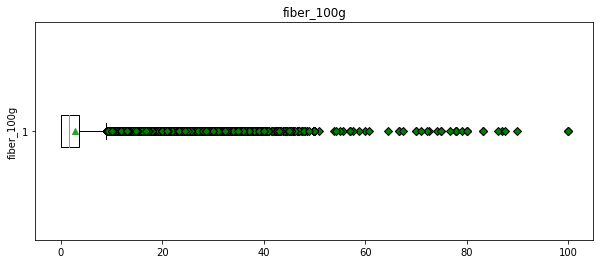

In [45]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('fiber_100g')
plt.ylabel("fiber_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['fiber_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

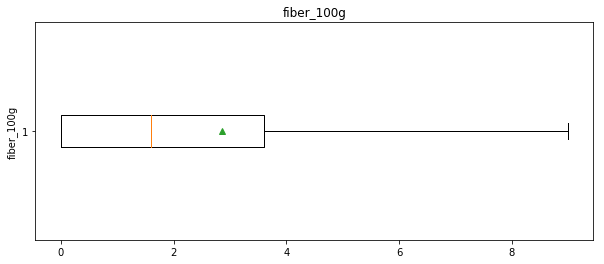

In [46]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('fiber_100g')
plt.ylabel("fiber_100g")

plt.boxplot(data_nutri_light['fiber_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion: </strong> 75% de la quantité de Fibre renseignée dans la base est comprise entre 0 et 3.6 grammes, avec une moyenne de 2.86 gr.

### Description Sel

In [47]:
data_nutri_light['salt_100g'].describe(include='all')

count    170540.000000
mean          1.375268
std          14.628462
min           0.000000
25%           0.116840
50%           0.678180
75%           1.361440
max        3048.000000
Name: salt_100g, dtype: float64

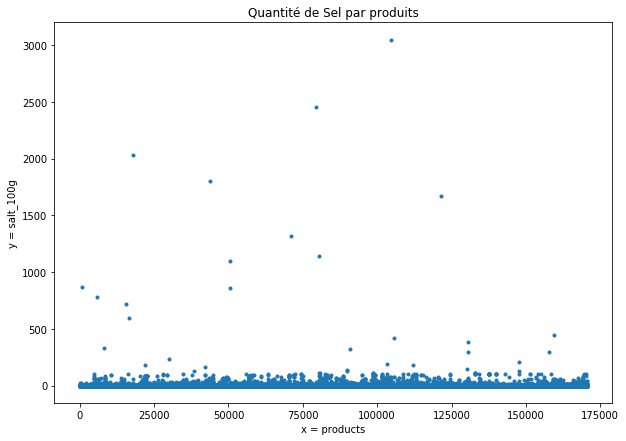

In [48]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Sel par produits')
plt.ylabel("y = salt_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['salt_100g'], ".", )

<span style="color:#3366ff"> 
Il y a beaucoup de données abérrantes (supèrieures à 100 gr).  
Les valeurs supérieures à 100 seront clippées à 100 gr.

In [49]:
data_nutri_light['salt_100g'] = data_nutri_light['salt_100g'].clip(0,100) 

In [50]:
data_nutri_light['salt_100g'].describe(include='all')

count    170540.000000
mean          1.260036
std           4.159123
min           0.000000
25%           0.116840
50%           0.678180
75%           1.361440
max         100.000000
Name: salt_100g, dtype: float64

<span style="color:#3366ff"> La moyenne et l'écart type ont été impactées à la baisse par ce clippage (moyenne passée de 1.37 à 1.26 gr).

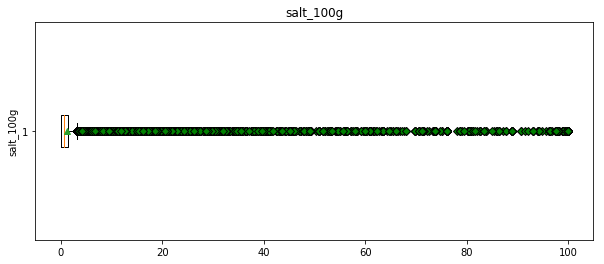

In [51]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('salt_100g')
plt.ylabel("salt_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['salt_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

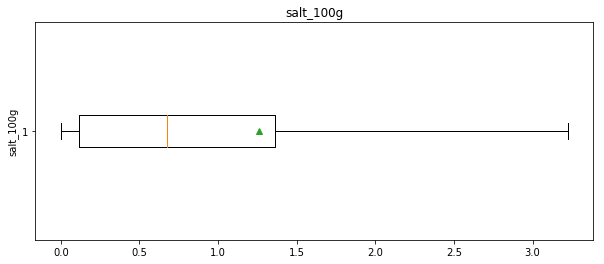

In [52]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('salt_100g')
plt.ylabel("salt_100g")

plt.boxplot(data_nutri_light['salt_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion:</strong> 75% de la quantité de sel renseignée dans la base à une valeure comprise entre 0 et 1.36 grammes, pour une moyene de 1.26 gr.

### Description Nb d'Ingrédients Issus de l'Huile de Palme (Ingredients From Palm Oil _ n )

In [53]:
data_nutri_light['ingredients_from_palm_oil_n'].describe(include='all')

count    170540.000000
mean          0.017802
std           0.134126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64

<span style="color:#3366ff"> Il y a au maximum 2 ingrédients issus de l'Huile de Palme par produits dans les différents produits de la base.

In [54]:
freq_null_palm_oil = (data_nutri_light['ingredients_from_palm_oil_n'] == 0).sum()
palm_oil_length = data_nutri_light['ingredients_from_palm_oil_n'].size

freq_not_null_palm_oil = palm_oil_length - freq_null_palm_oil

print ("Seuls", freq_not_null_palm_oil , "produits sur", 
       palm_oil_length, " ont le champs Nb Ingredients From Palm Oil complété, ce qui est très peu.")

Seuls 2993 produits sur 170540  ont le champs Nb Ingredients From Palm Oil complété, ce qui est très peu.


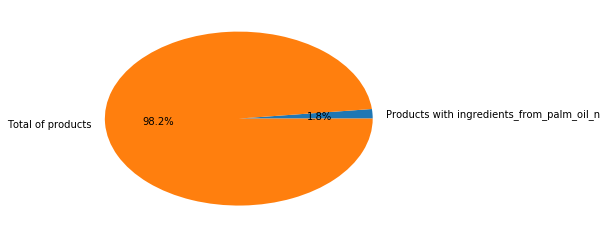

In [55]:
products_palm_oil = [freq_not_null_palm_oil, palm_oil_length - freq_not_null_palm_oil]
labels = 'Products with ingredients_from_palm_oil_n', 'Total of products'
plt.pie(products_palm_oil, 
        autopct = '%0.1f%%',
        labels=labels)
plt.show()

<span style="color:#3366ff"> Il y a très peu de produits dans la base de donnée (moins de 2%) dans lequel il y a des ingrédients issus de l'huile de palme.

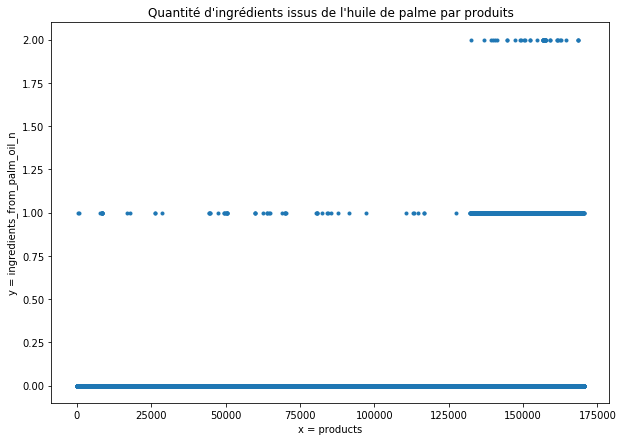

In [56]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title("Quantité d'ingrédients issus de l'huile de palme par produits")
plt.ylabel("y = ingredients_from_palm_oil_n")
plt.xlabel("x = products")


plt.plot(data_nutri_light['ingredients_from_palm_oil_n'], ".", )

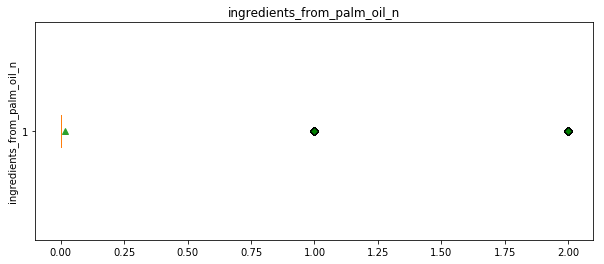

In [57]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
green_diamond = dict(markerfacecolor='g', marker='D')
ax.set_title('ingredients_from_palm_oil_n')
plt.ylabel("ingredients_from_palm_oil_n")

plt.boxplot(data_nutri_light['ingredients_from_palm_oil_n'], 
            showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

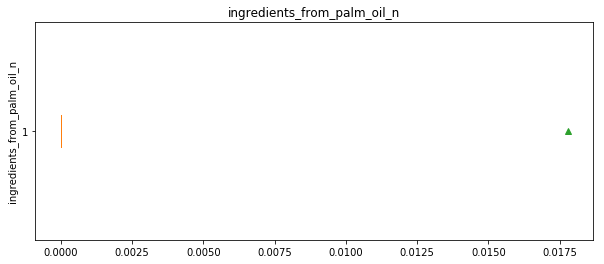

In [58]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('ingredients_from_palm_oil_n')
plt.ylabel("ingredients_from_palm_oil_n")

plt.boxplot(data_nutri_light['ingredients_from_palm_oil_n'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion: </strong>  le nombre moyen d'ingredients issus de l'huile de palme par produits dans la base est infime: 0.017.

### Description Nb d'Ingrédients Peut Etre Issus de l'Huile de Palme (Ingredients May Be From Palm Oil _ n )

In [59]:
data_nutri_light['ingredients_that_may_be_from_palm_oil_n'].describe(include='all')

count    170540.000000
mean          0.050616
std           0.255526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64

<span style="color:#3366ff"> Il y a au maximum 6 ingrédients "peut être issus de l'Huile de Palme" dans les différents produits de la base.

In [60]:
freq_null_maybe_from_palm_oil = (data_nutri_light['ingredients_that_may_be_from_palm_oil_n'] == 0).sum()
maybe_from_palm_oil_length = data_nutri_light['ingredients_that_may_be_from_palm_oil_n'].size

freq_not_null_maybe_from_palm_oil = maybe_from_palm_oil_length - freq_null_maybe_from_palm_oil

print ("Seuls", freq_not_null_maybe_from_palm_oil , 
       "produits sur", maybe_from_palm_oil_length,
       " ont le champs Nb Ingredients May Be From Palm Oil complété, ce qui est très peu.")

Seuls 7427 produits sur 170540  ont le champs Nb Ingredients May Be From Palm Oil complété, ce qui est très peu.


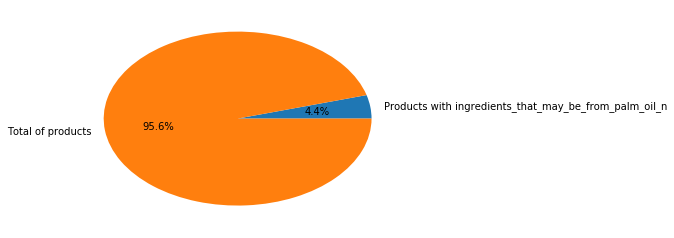

In [61]:
products_maybe_from_palm_oil = [freq_not_null_maybe_from_palm_oil, 
                                maybe_from_palm_oil_length - freq_not_null_maybe_from_palm_oil]
labels = 'Products with ingredients_that_may_be_from_palm_oil_n', 'Total of products'
plt.pie(products_maybe_from_palm_oil, 
        autopct = '%0.1f%%',
        labels=labels)
plt.show()

<span style="color:#3366ff"> il y a très peu de produits (4,4%) qui contiennent des ingrédients peut être issus de l'huile de palme dans la base de données. 

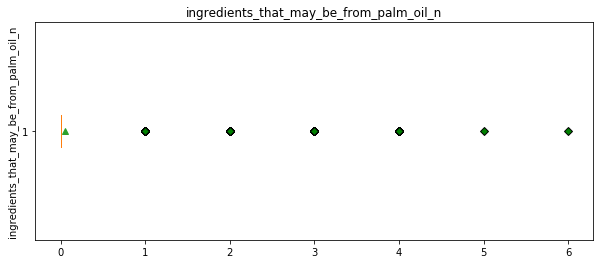

In [62]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
green_diamond = dict(markerfacecolor='g', marker='D')
ax.set_title('ingredients_that_may_be_from_palm_oil_n')
plt.ylabel("ingredients_that_may_be_from_palm_oil_n")

plt.boxplot(data_nutri_light['ingredients_that_may_be_from_palm_oil_n'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

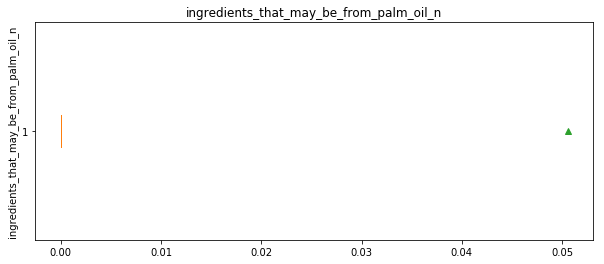

In [63]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('ingredients_that_may_be_from_palm_oil_n')
plt.ylabel("ingredients_that_may_be_from_palm_oil_n")

plt.boxplot(data_nutri_light['ingredients_that_may_be_from_palm_oil_n'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong> Conclusion: </strong> le nombre moyen d'ingredients "peut être issus de l'huile de palme" par produits dans la base est infime: 0.05.

### Description Carbohydrates

In [64]:
data_nutri_light['carbohydrates_100g'].describe(include='all')

count    170540.000000
mean         34.573068
std          28.217237
min           0.000000
25%           8.000000
50%          26.670000
75%          60.100000
max         190.000000
Name: carbohydrates_100g, dtype: float64

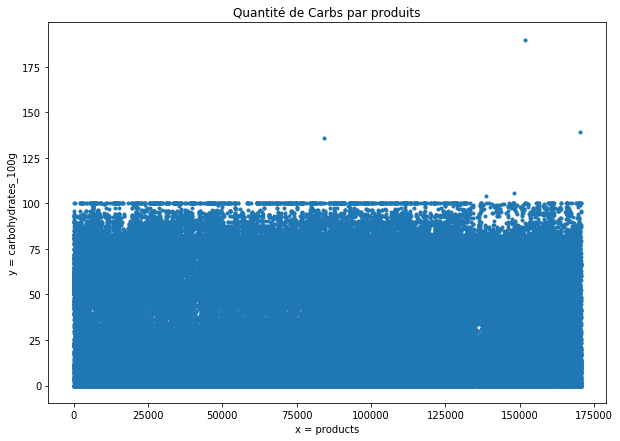

In [65]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Carbs par produits')
plt.ylabel("y = carbohydrates_100g")
plt.xlabel("x = products")

plt.plot(data_nutri_light['carbohydrates_100g'], ".")

<span style="color:#3366ff"> Il y a quelques outliers (max) qui seront clippés à 100gr. 

In [66]:
data_nutri_light['carbohydrates_100g'] = data_nutri_light['carbohydrates_100g'].clip(0,100) 

In [67]:
data_nutri_light['carbohydrates_100g'].describe(include='all')

count    170540.000000
mean         34.572042
std          28.213718
min           0.000000
25%           8.000000
50%          26.670000
75%          60.100000
max         100.000000
Name: carbohydrates_100g, dtype: float64

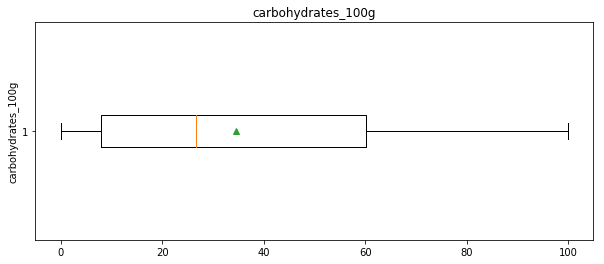

In [68]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('carbohydrates_100g')
plt.ylabel("carbohydrates_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['carbohydrates_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

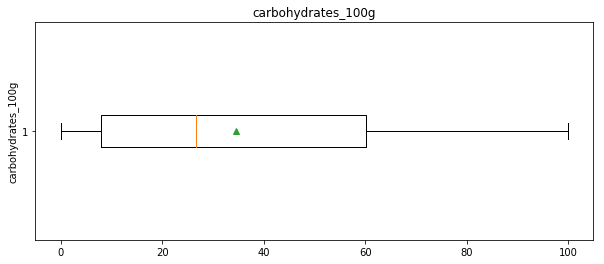

In [69]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('carbohydrates_100g')
plt.ylabel("carbohydrates_100g")

plt.boxplot(data_nutri_light['carbohydrates_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong>Conclusion: </strong> 75% de la quantité de Carbohydrates renseignée dans la base à une valeure comprise entre 0 et 60 grammes, avec une moyenne de 34.57 gr.

### Description Sodium

In [70]:
data_nutri_light['sodium_100g'].describe(include='all')

count    170540.000000
mean          0.541444
std           5.759230
min           0.000000
25%           0.046000
50%           0.267000
75%           0.536000
max        1200.000000
Name: sodium_100g, dtype: float64

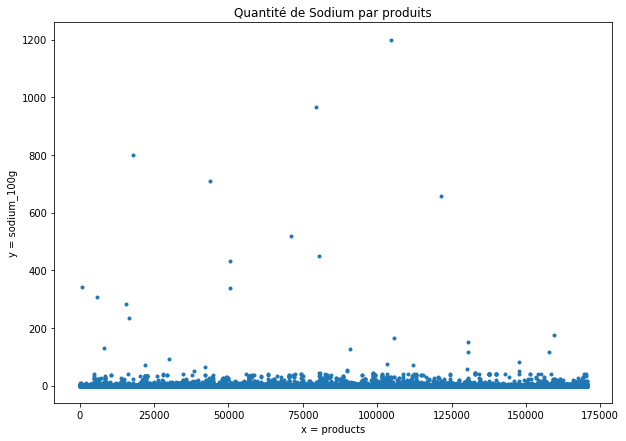

In [71]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Sodium par produits')
plt.ylabel("y = sodium_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['sodium_100g'], ".")

<span style="color:#3366ff"> Beaucoup d'outliers supérieurs à 100gr.

In [72]:
data_nutri_light['sodium_100g'] = data_nutri_light['sodium_100g'].clip(0,100) 

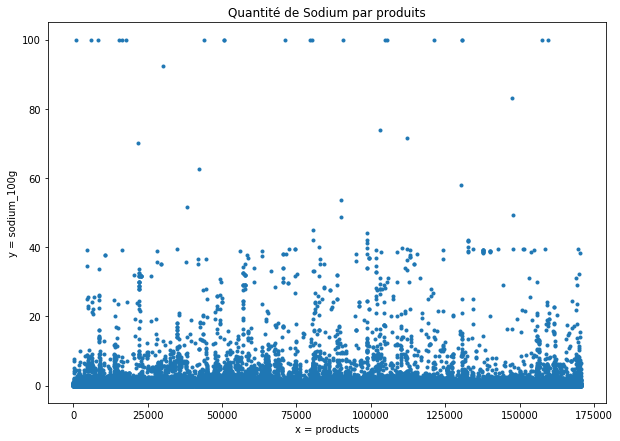

In [73]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title('Quantité de Sodium par produits')
plt.ylabel("y = sodium_100g")
plt.xlabel("x = products")


plt.plot(data_nutri_light['sodium_100g'], ".")

In [74]:
data_nutri_light['sodium_100g'].describe(include='all')

count    170540.000000
mean          0.504998
std           1.964936
min           0.000000
25%           0.046000
50%           0.267000
75%           0.536000
max         100.000000
Name: sodium_100g, dtype: float64

<span style="color:#3366ff"> La moyenne a baissée de 0.04% suite à ce clippage (de 0.54 à 0.5gr).

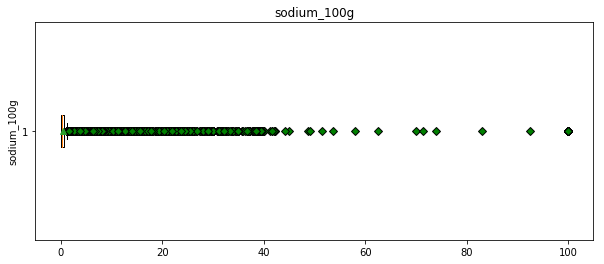

In [75]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('sodium_100g')
plt.ylabel("sodium_100g")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['sodium_100g'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

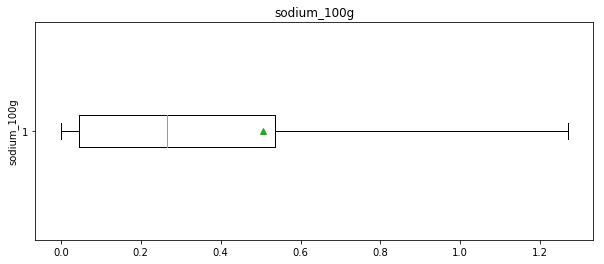

In [76]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('sodium_100g')
plt.ylabel("sodium_100g")

plt.boxplot(data_nutri_light['sodium_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> 75% de la quantité de Sodium renseignée dans la base à une valeure comprise entre 0 et 0.53 grammes, avec une moyenne de 0.50 gr.

### Description  Nb d'additifs (additives_n)

In [77]:
data_nutri_light['additives_n'].describe(include='all')

count    170540.000000
mean          1.967972
std           2.517374
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64

<span style="color:#3366ff"> Il peut y avoir jusqu'a 31 additifs dans les différents produits de la base.

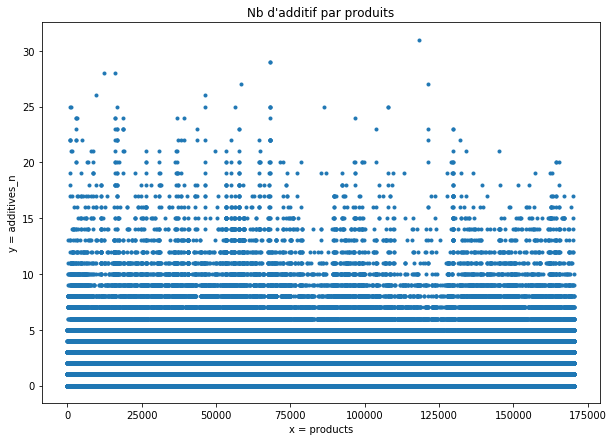

In [78]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
ax.set_title("Nb d'additif par produits")
plt.ylabel("y = additives_n")
plt.xlabel("x = products")


plt.plot(data_nutri_light['additives_n'], ".")

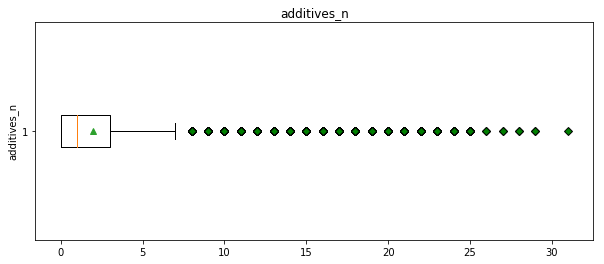

In [79]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('additives_n')
plt.ylabel("additives_n")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_nutri_light['additives_n'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

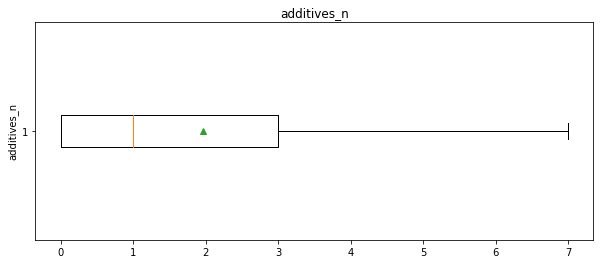

In [80]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('additives_n')
plt.ylabel("additives_n")

plt.boxplot(data_nutri_light['additives_n'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> 75% du nombre d'additif renseigné dans la base à une valeure comprise entre 0 et 3, avec une moyenne de 1.96 additifs par produits.

### Description  Score

In [81]:
data_nutri_light['nutrition-score-fr_100g'].describe(include='all')

count    170540.000000
mean          8.796998
std           9.077410
min         -15.000000
25%           1.000000
50%           9.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

<span style="color:#3366ff"> Le Score va bien de -15 à 40.

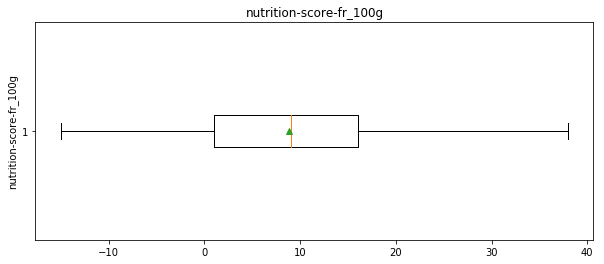

In [82]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g')
plt.ylabel("nutrition-score-fr_100g")

plt.boxplot(data_nutri_light['nutrition-score-fr_100g'], showmeans=True, vert=False, showfliers= False)
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> La moyenne des Scores de la base est de 8.79 (ce qui correspond à un Grade C, qui est le grade "central").

### Description Grade

In [83]:
data_nutri_light['nutrition_grade_fr'].describe(include='all')

count     170540
unique         5
top            d
freq       46761
Name: nutrition_grade_fr, dtype: object

<span style="color:#3366ff"> <strong>Conclusion:</strong> le plus Grade le plus renseigné dans la base cleanée est D.

### Conclusion "Description"

<span style="color:#3366ff"> <strong> Dans cette base de donnée, les valeurs sont très variées d'un paramètres à l'autre en terme de moyenne, d'ecart type... Les élements considérés comme outliers (masses négatives, masses supérieures à 100gr, energies supérieures à 5000 kJ) ont été clippées. </strong>

# Analyse bivariée

## Visualisation des datas et calculs des Coefs de corrélation

### Visu Heatmap: relation entre chacuns des paramètres

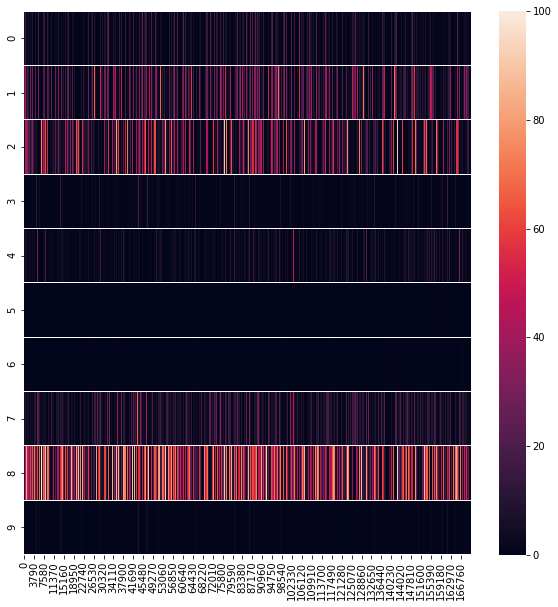

In [84]:
fig, ax = plt.subplots(figsize=(10,10)) 

sea.heatmap([data_nutri_light['saturated-fat_100g'], #0
             data_nutri_light['fat_100g'],           #1
             data_nutri_light['sugars_100g'],        #2
             #data_nutri_light['energy_100g'],      retiré car pas sur la meme echelle    
             data_nutri_light['salt_100g'],          #3         
             data_nutri_light['fiber_100g'],         #4
             data_nutri_light['ingredients_from_palm_oil_n'],              #5
             data_nutri_light['ingredients_that_may_be_from_palm_oil_n'],  #6
             data_nutri_light['proteins_100g'],                            #7 
             data_nutri_light['carbohydrates_100g'],                       #8
             data_nutri_light['sodium_100g']                               #9     
            ],
           #vmin=20,
           #vmax=100
           )

<span style="color:#3366ff"> Trois paramètres ressortent fortement de ce heatmap: 
    
    
<span style="color:#3366ff"> - fat_100g (#1), </span>  

<span style="color:#3366ff"> - sugars_100g (#2), </span>

<span style="color:#3366ff"> - carbohydrates_100g (#8). </span> 



<span style="color:#3366ff"> Deux paramètres: proteins_100g #7 et fat_100g #2 ressortent plus faiblement.

<span style="color:#3366ff"> Il y a une corrélation normale entre les sucres (#2) et les carbohydrates (#8) (étant donné que les sucres font partis des glucides).

### Visu / Corrélation: Proteins / Fat

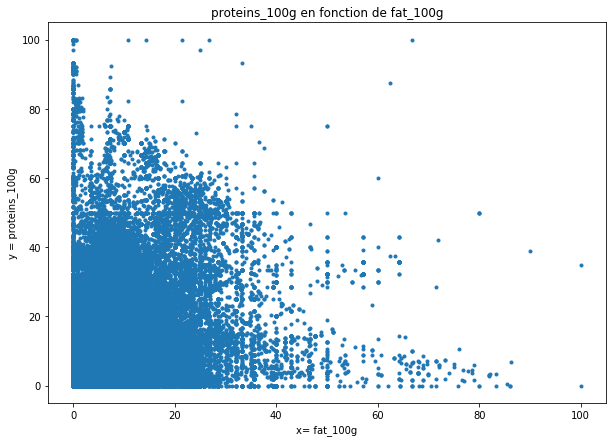

In [85]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('proteins_100g en fonction de fat_100g')
plt.ylabel("y = proteins_100g")
plt.xlabel("x= fat_100g")

plt.plot(data_nutri_light['proteins_100g'], data_nutri_light['fat_100g'], ".")
plt.show()

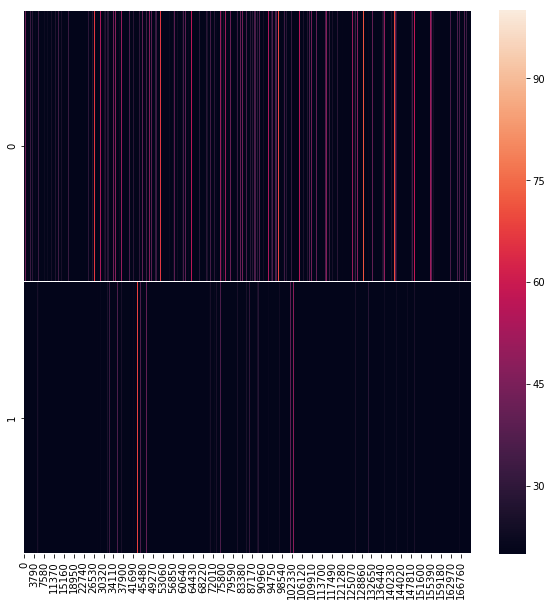

In [86]:
fig, ax = plt.subplots(figsize=(10,10)) 

sea.heatmap([
             data_nutri_light['fat_100g'],           
             data_nutri_light['proteins_100g']
            ], 
            #center=0, 
            vmin=20, 
            vmax=100
            )

In [87]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['proteins_100g'], 
    data_nutri_light['fat_100g'])[0]
     )

Le Coef. de corrélation est de 0.2879508177460501


<span style="color:#3366ff"> <strong>Conclusion:</strong>  Il y a une petite corrélation entre la quantité de protéine et de graisse.

### Visu / Corrélation: Proteins / Saturated Fat

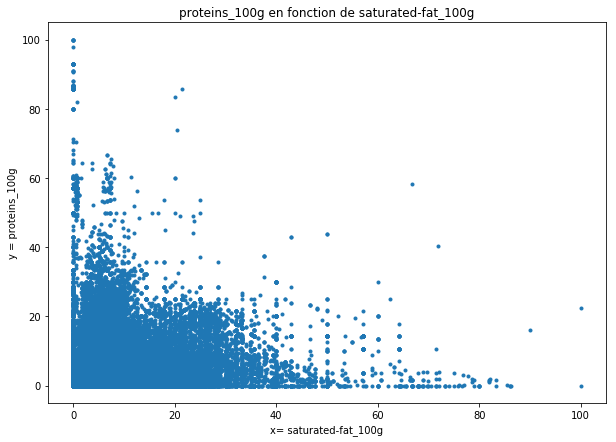

In [88]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('proteins_100g en fonction de saturated-fat_100g')
plt.ylabel("y = proteins_100g")
plt.xlabel("x= saturated-fat_100g")

plt.plot(data_nutri_light['proteins_100g'], data_nutri_light['saturated-fat_100g'], ".")
plt.show()

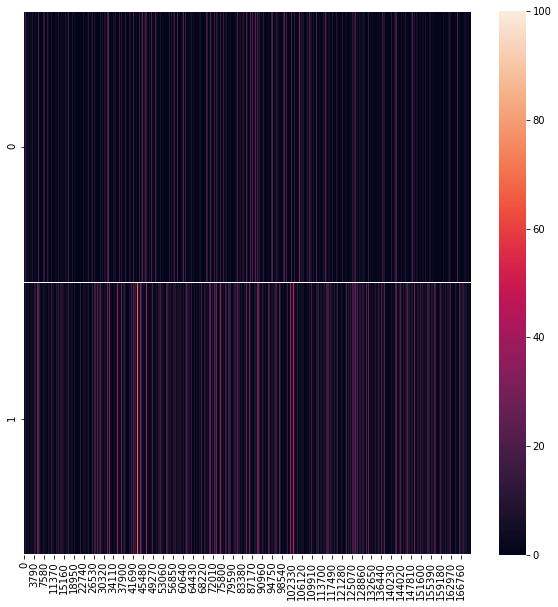

In [89]:
fig, ax = plt.subplots(figsize=(10,10)) 

sea.heatmap([
             data_nutri_light['saturated-fat_100g'],           
             data_nutri_light['proteins_100g']                                          
            ])

In [90]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['proteins_100g'], 
    data_nutri_light['saturated-fat_100g'])[0]
     )

Le Coef. de corrélation est de 0.19352191343839173


<span style="color:#3366ff"> <strong>Conclusion:</strong>  Il y a une très petite corrélation entre la quantité de protèine et de graisse saturée.

### Visu / Corrélation: Proteins / Sugars

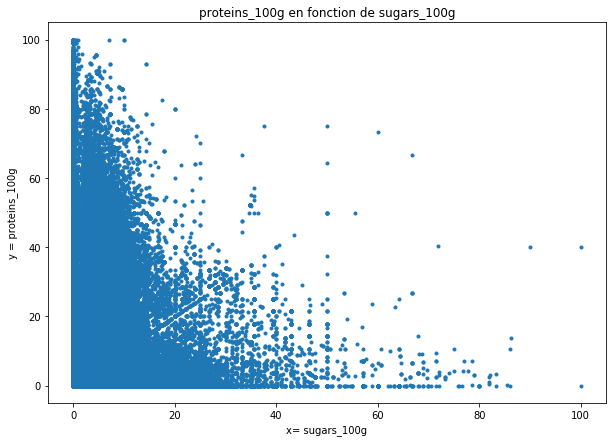

In [91]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('proteins_100g en fonction de sugars_100g')
plt.ylabel("y = proteins_100g")
plt.xlabel("x= sugars_100g")

plt.plot(data_nutri_light['proteins_100g'], data_nutri_light['sugars_100g'], ".")
plt.show()

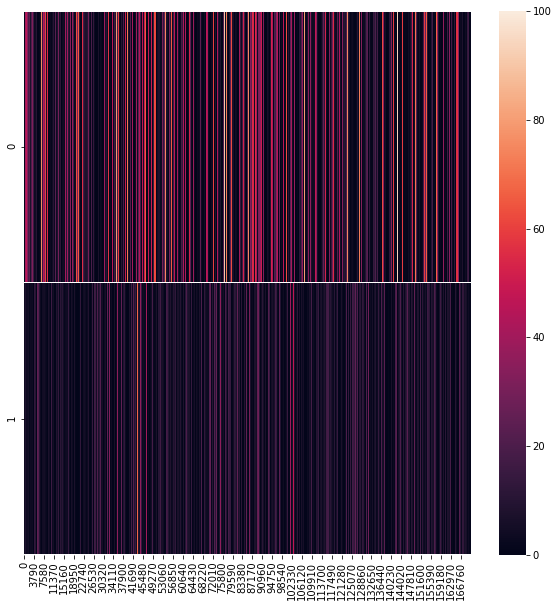

In [92]:
fig, ax = plt.subplots(figsize=(10,10)) 

sea.heatmap([
             data_nutri_light['sugars_100g'],           
             data_nutri_light['proteins_100g']                                          
            ])

In [93]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['proteins_100g'], 
    data_nutri_light['sugars_100g'])[0]
     )

Le Coef. de corrélation est de -0.2619627936926481


<span style="color:#3366ff"> <strong>Conclusion:</strong>  Il y a une petite corrélation entre la quantité de protéines et de sucre.

### Visu / Corrélation: Proteins / Carbohydrates

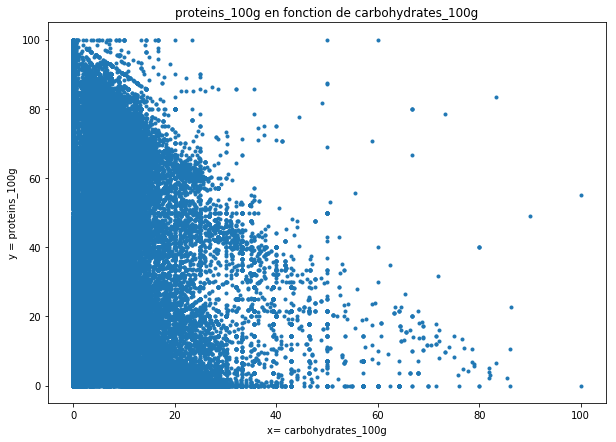

In [94]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('proteins_100g en fonction de carbohydrates_100g')
plt.ylabel("y = proteins_100g")
plt.xlabel("x= carbohydrates_100g")

plt.plot(data_nutri_light['proteins_100g'], data_nutri_light['carbohydrates_100g'], ".")
plt.show()

In [95]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['proteins_100g'], 
    data_nutri_light['carbohydrates_100g'])[0]
     )

Le Coef. de corrélation est de -0.10842712518679698


<span style="color:#3366ff"> <strong>Conclusion:</strong> Il n'ya pas de corrélation entre la quantité de Glucides et de Protéines.

### Visu / Corrélation: Proteins / Fiber

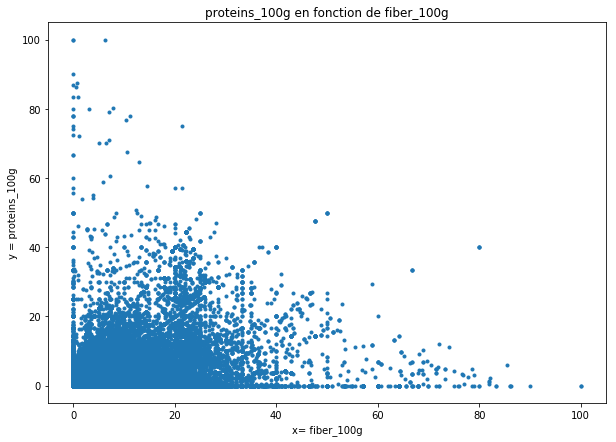

In [96]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('proteins_100g en fonction de fiber_100g')
plt.ylabel("y = proteins_100g")
plt.xlabel("x= fiber_100g")

plt.plot(data_nutri_light['proteins_100g'], data_nutri_light['fiber_100g'], ".")
plt.show()

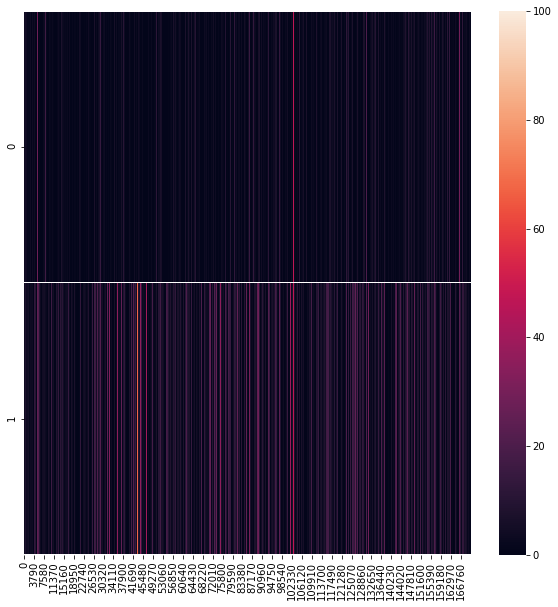

In [97]:
fig, ax = plt.subplots(figsize=(10,10)) 

sea.heatmap([
             data_nutri_light['fiber_100g'],           
             data_nutri_light['proteins_100g']                                          
            ])

In [98]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['proteins_100g'], 
    data_nutri_light['fiber_100g'])[0]
     )

Le Coef. de corrélation est de 0.24401218389364554


<span style="color:#3366ff"> <strong>Conclusion:</strong> Il y a une petite corrélation entre la quantité de Fibre et celle de protéines.

### Visu / Corrélation: Sodium / Sel

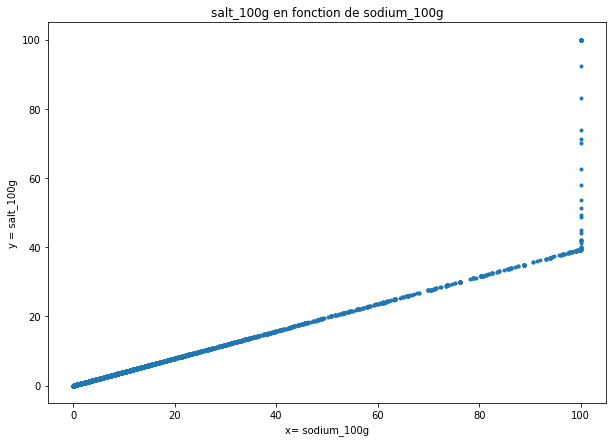

In [99]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('salt_100g en fonction de sodium_100g')
plt.ylabel("y = salt_100g")
plt.xlabel("x= sodium_100g")

plt.plot(data_nutri_light['salt_100g'], data_nutri_light['sodium_100g'], ".")
plt.show()

In [100]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['salt_100g'], 
    data_nutri_light['sodium_100g'])[0]
     )

Le Coef. de corrélation est de 0.941119617657024


<span style="color:#3366ff"> <strong>Conclusion:</strong> il y a une relation linéaire entre le sodium et le sel. Seule le paramètre avec la plus grande corrélation avec le Score sera conservé.

### Visu / Corrélation: Saturated Fat / Fat

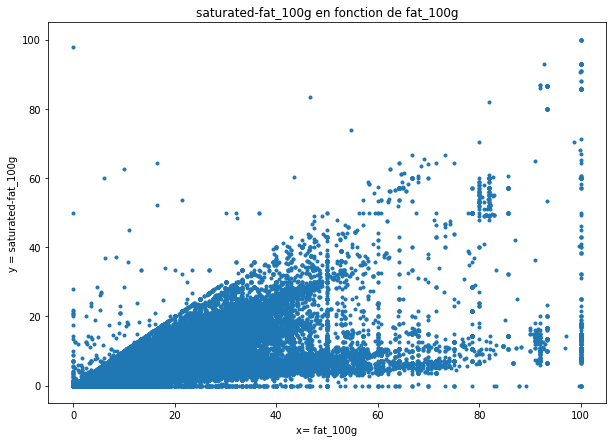

In [101]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('saturated-fat_100g en fonction de fat_100g')
plt.ylabel("y = saturated-fat_100g")
plt.xlabel("x= fat_100g")

plt.plot(data_nutri_light['fat_100g'], data_nutri_light['saturated-fat_100g'], ".")
plt.show()

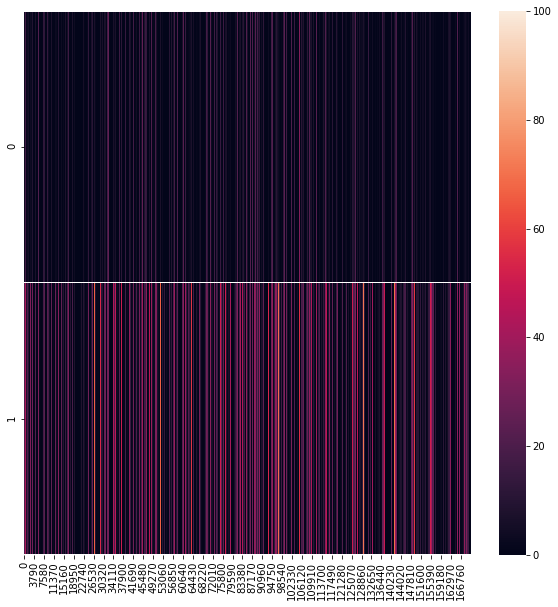

In [102]:
fig, ax = plt.subplots(figsize=(10,10)) 

sea.heatmap([data_nutri_light['saturated-fat_100g'], 
             data_nutri_light['fat_100g']           
            ])

In [103]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['fat_100g'], 
    data_nutri_light['saturated-fat_100g'])[0]
     )

Le Coef. de corrélation est de 0.7001440573140316


<span style="color:#3366ff"> <strong>Conclusion:</strong> Il y a une forte corrélation entre la quantité de Graisse et celle de la Graisse Saturée. Seule le paramètre avec la plus grande corrélation avec le Score sera conservé.

### Visu / Corrélation: Carbohydrates / Sucre

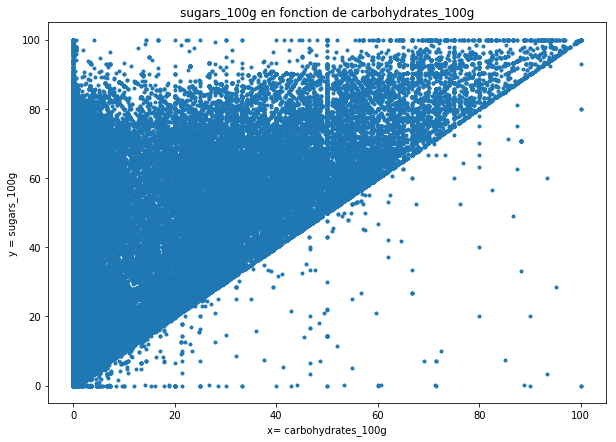

In [104]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('sugars_100g en fonction de carbohydrates_100g')
plt.ylabel("y = sugars_100g")
plt.xlabel("x= carbohydrates_100g")

plt.plot(data_nutri_light['sugars_100g'], data_nutri_light['carbohydrates_100g'], ".")
plt.show()

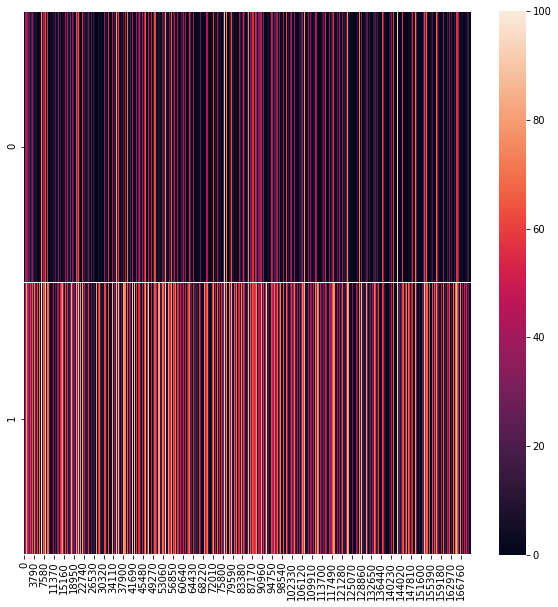

In [105]:
fig, ax = plt.subplots(figsize=(10,10)) 

sea.heatmap([
             data_nutri_light['sugars_100g'],           
             data_nutri_light['carbohydrates_100g']                                          
            ])

In [106]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['sugars_100g'], 
    data_nutri_light['carbohydrates_100g'])[0]
     )

Le Coef. de corrélation est de 0.6210106494263917


<span style="color:#3366ff"> <strong>Conclusion:</strong> Il y a une corrélation entre la quantité de Sucres et de Carbohydrates.

### Visu / Corrélation: Score / Sucre

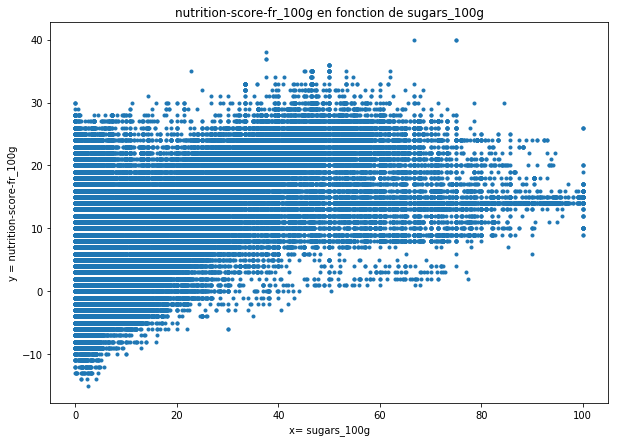

In [107]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de sugars_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= sugars_100g")

plt.plot(data_nutri_light['sugars_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [108]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['sugars_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.48577487557249394


<span style="color:#3366ff"> <strong>Conclusion:</strong> Comme nous le montre déjà le tableau pour le calcul du score, il y une a une corrélation entre la quantité de sucre et le score: plus la quantité de sucre est elevée, plus le score est elevé.

### Visu / Corrélation: Score / Saturated Fat

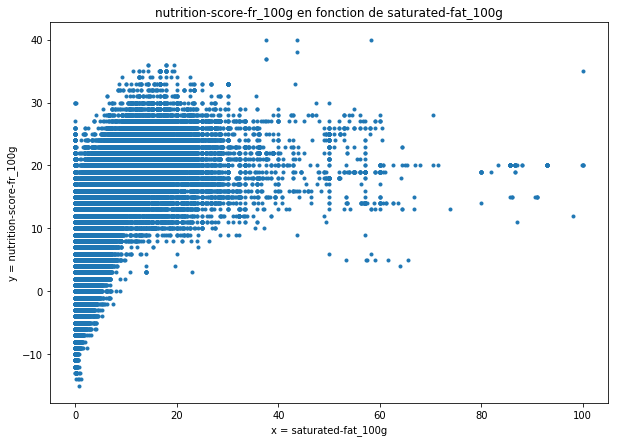

In [109]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de saturated-fat_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x = saturated-fat_100g")

plt.plot(data_nutri_light['saturated-fat_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [110]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['saturated-fat_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.653445571707252


<span style="color:#3366ff"> <strong>Conclusion:</strong> Comme nous le montre déjà le tableau du calcul du score, il y une a une corrélation FORTE entre la quantité de graisse saturée et le score: plus la quantité de graisse saturée est elevée, plus le score est elevé.

### Visu / Corrélation: Score / Fat

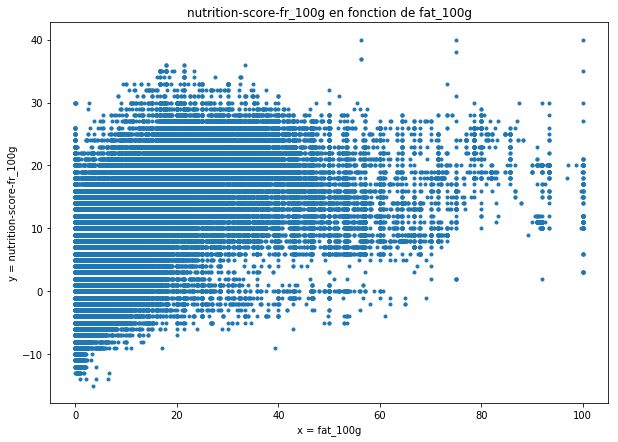

In [111]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de fat_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x = fat_100g")

plt.plot(data_nutri_light['fat_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [112]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['fat_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.5722983656259549


<span style="color:#3366ff"> <strong>Conclusion:</strong> Comme nous le montre déjà le tableau de calcul du score, il y une a une corrélation plutôt forte entre la quantité de graisse et le score: plus la quantité de graisse est elevée, plus le score est elevé.

### Visu : Corrélation: Score / Energy

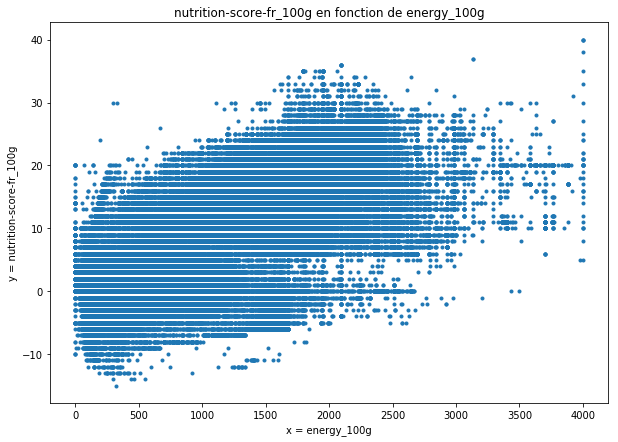

In [113]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de energy_100g')

plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x = energy_100g")

plt.plot(data_nutri_light['energy_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [114]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['energy_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.6304616787638785


<span style="color:#3366ff"> <strong>Conclusion:</strong> Comme nous le montre déjà le tableau du calcul du score, il y une a une corrélation FORTE entre la quantité l'energie et le score: plus la valeur de l'energie est elevée, plus le score est elevé.

### Visu / Corrélation: Score / Salt

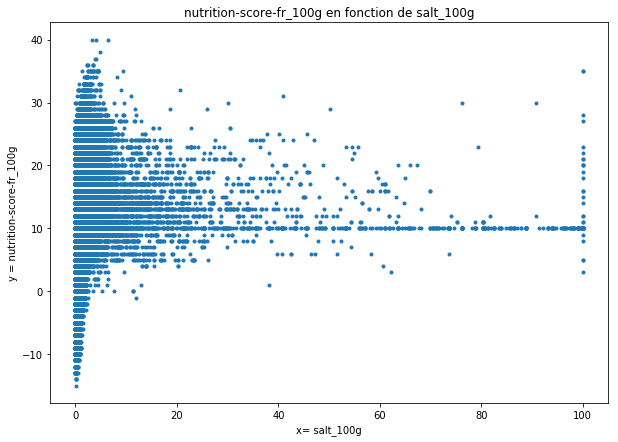

In [115]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de salt_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= salt_100g")

plt.plot(data_nutri_light['salt_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [116]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['salt_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.12376763229228085


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité de sel et le score.

### Visu / Corrélation: Score / Protéines

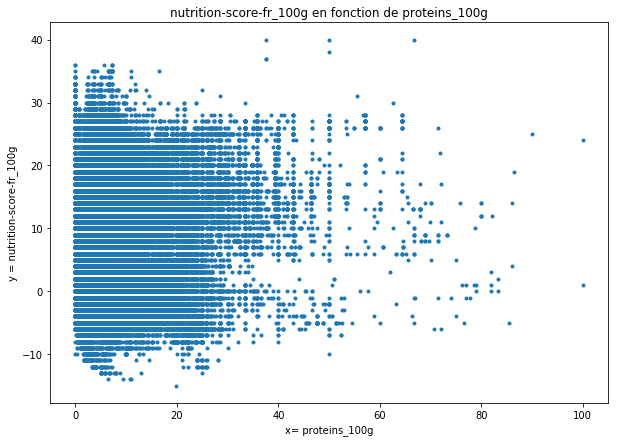

In [117]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de proteins_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= proteins_100g")

plt.plot(data_nutri_light['proteins_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [118]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['proteins_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.11264878393981835


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité de protéines et le score.

### Visu / Corrélation: Score / Fiber

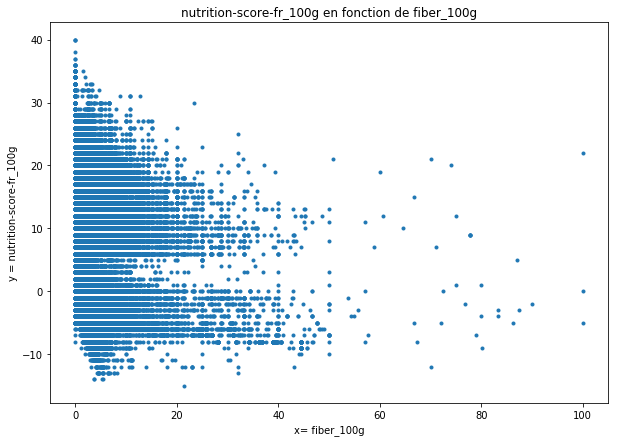

In [119]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de fiber_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= fiber_100g")

plt.plot(data_nutri_light['fiber_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [120]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['fiber_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de -0.14882856122108887


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité de fibre et le score.

### Visu / Corrélation: Score / ingredients_from_palm_oil

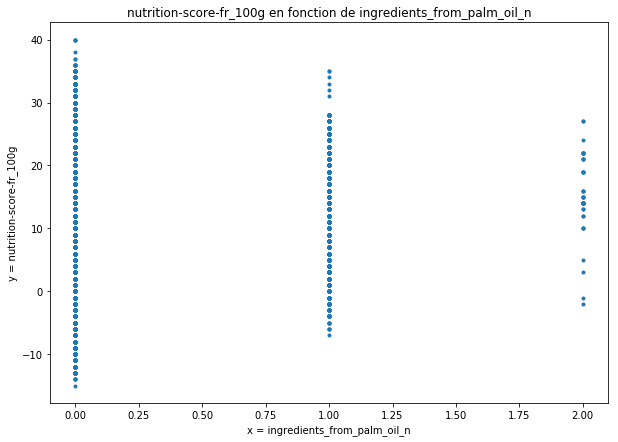

In [121]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de ingredients_from_palm_oil_n')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x = ingredients_from_palm_oil_n")

plt.plot(data_nutri_light['ingredients_from_palm_oil_n'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [122]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['ingredients_from_palm_oil_n'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.08993387076224933


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité d'ingrédients issues de l'huile de palme et le score.

### Visu / Corrélation: Score / ingredients_that_may_be_from_palm_oil

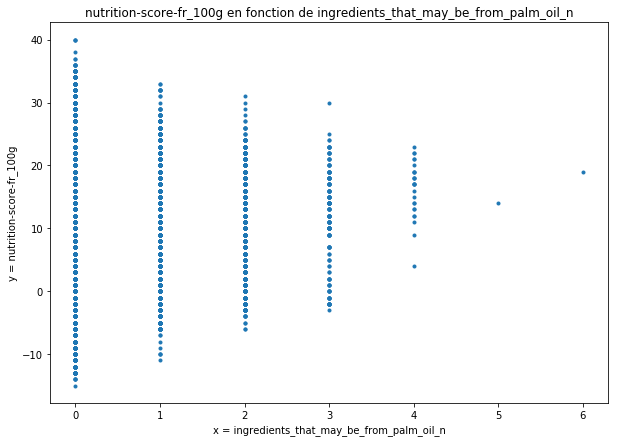

In [123]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de ingredients_that_may_be_from_palm_oil_n')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x = ingredients_that_may_be_from_palm_oil_n")

plt.plot(data_nutri_light['ingredients_that_may_be_from_palm_oil_n'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [124]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['ingredients_that_may_be_from_palm_oil_n'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.04461517967501209


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité d'ingrédients peut être issues de l'huile de palme et le score.

### Visu / Corrélation: Score / Sodium

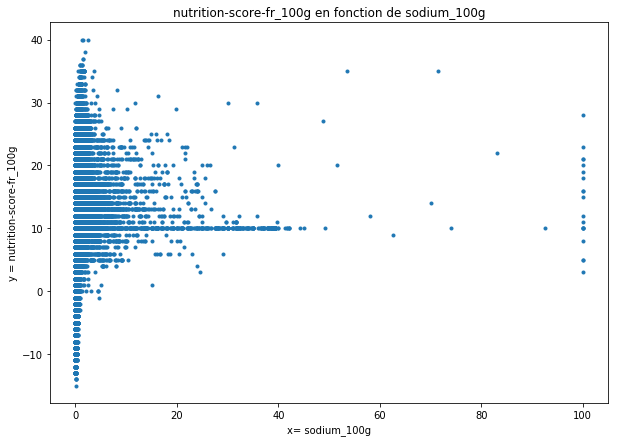

In [125]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de sodium_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= sodium_100g")

plt.plot(data_nutri_light['sodium_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [126]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['sodium_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.10604814925987392


<span style="color:#3366ff"> <strong>Conclusion:</strong> il y a une très faible corrélation entre le Score et la quantité de Sodium.

### Visu / Corrélation: Score / Carbohydrates

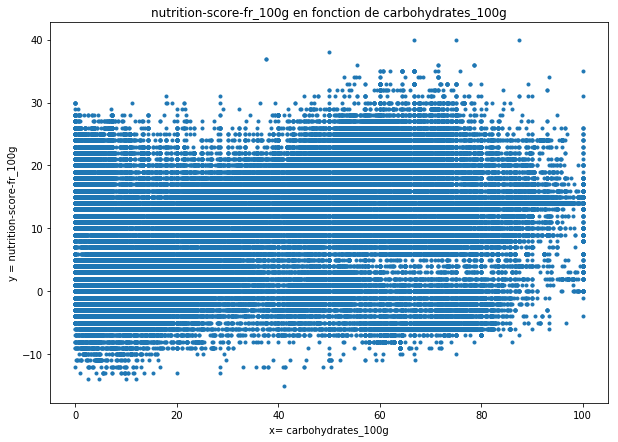

In [127]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de carbohydrates_100g')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= carbohydrates_100g")

plt.plot(data_nutri_light['carbohydrates_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [128]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['carbohydrates_100g'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.26794483390139223


<span style="color:#3366ff"> <strong>Conclusion:</strong> il y a une faible corrélation entre le Score et la quantité de Carbohydrates.

### Visu / Corrélation: Score / Nb d'additifs¶

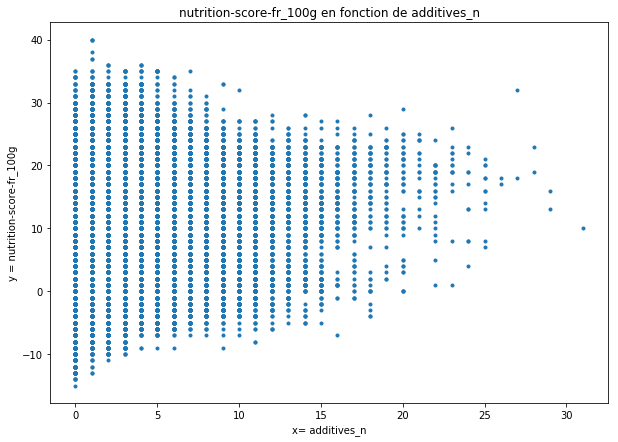

In [129]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('nutrition-score-fr_100g en fonction de additives_n')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= additives_n")

plt.plot(data_nutri_light['additives_n'], data_nutri_light['nutrition-score-fr_100g'], ".")
plt.show()

In [130]:
print("Le Coef. de corrélation est de", st.pearsonr(
    data_nutri_light['additives_n'], 
    data_nutri_light['nutrition-score-fr_100g'])[0]
     )

Le Coef. de corrélation est de 0.17530187569984845


<span style="color:#3366ff"> <strong>Conclusion:</strong> il y a une très faible corrélation entre le Score et le nombre d'additifs.

### Tableau de Synthèse "Corrélations: Paramètres vs Paramètres"

<span style="color:#3366ff"><table class="wikitable">
<tr>
<th>Produits</th>
<th>Coef de Corrélation</th>
<th>Impact sur la Reg Lineaire</th>
</tr>
<tr>
<td>Proteins / Fat</td>
<td>0.28</td>
<td>-</td>
</tr>
<tr>
<td>Proteins / Sat Fat</td>
<td>0.19</td>
<td>-</td>
</tr>
<tr>
<td>Proteins / Sugars</td>
<td>-0.26</td>
<td>-</td>
</tr>
<tr>
<td>Proteins / Carbohydrates</td>
<td>-0.10</td>
<td>--</td>
</tr>
<tr>
<td>Sat Fat / Fat</td>
<td>0.70</td>
<td>++</td>
</tr>
<tr>
<td>Salt / Sodium</td>
<td>0.94</td>
<td>+++</td>
</tr>
<tr>
<td>Sugars / carbohydrates</td>
<td>0.62</td>
<td>++</td>    
</tr>
<tr>
</table>

<span style="color:#3366ff"> De par leurs natures chimiques, certains paramètres ont des relations linéaires fortes entre eux. 


<span style="color:#3366ff"> Lors de la régréssion linéaire, pour chaque couple, un des deux devra être supprimé au profit de l'autre:
    
<span style="color:#3366ff"> - saturated-fat_100g et fat_100g     
<span style="color:#3366ff"> - salt_100g et sodium_100g   
<span style="color:#3366ff"> - sugars_100g et carbohydrates_100g   

### Tableau de Synthèse "Corrélations: Score vs Params"

<span style="color:#3366ff"><table class="wikitable">
<tr>
<th>Produits</th>
<th>Corrélation avec le Score</th>
<th>Intérêt</th>
</tr>
<tr>
<td>Sugars</td>
<td>0.485</td>
<td>+</td>
</tr>
<tr>
<td>Saturated fat</td>
<td>0.652</td>
<td>+++</td>
</tr>
<tr>
<td>Fat</td>
<td>0.573</td>
<td>++</td>
</tr>
<tr>
<td>Energy</td>
<td>0.63</td>
<td>+++</td>
</tr>
<tr>
<td>Proteins</td>
<td>0.112</td>
<td>-</td>
</tr>
<tr>
<td>Fiber</td>
<td>-0.149</td>
<td>-</td>
</tr>
<tr>
<td>Salt</td>
<td>0.123</td>
<td>-</td>    
</tr>
<tr>
<td>From Palm Oil</td>
<td>0.089</td>
<td>--</td>
</tr>
<tr>    
<td>Maybe From Palm Oil</td>
<td>0.044</td>
<td>--</td>
</tr>    
<tr>
<td>Carbohydrates</td>
<td>0.267</td>
<td>+/-</td>
</tr>    
<tr>
<td>Sodium</td>
<td>0.106</td>
<td>-</td>
</tr>
<tr>
<td>Nb Additifs</td>
<td>0.175</td>
<td>-</td>
</tr>           
<tr>
</table>

<span style="color:#3366ff"> <strong>Conclusion:</strong> seuls les paramètres avec une forte corrélation avec le Score ont un intérêt dans le cadre de la Régression Linéaire:

<span style="color:#3366ff">- sugars_100g avec un coef. de corrélation avec le Score de 0.485;	    
<span style="color:#3366ff">- saturated-fat_100g avec un coef. de corrélation avec le Score de 0.652;    
<span style="color:#3366ff">- fat_100g avec un coef. de corrélation avec le Score de 0.573;    
<span style="color:#3366ff">- Energy_100g avec un coef. de corrélation avec le Score de 0.63.   

# Visu: Grade / Paramètres

### Visu / Corrélation: Grade / Sucre

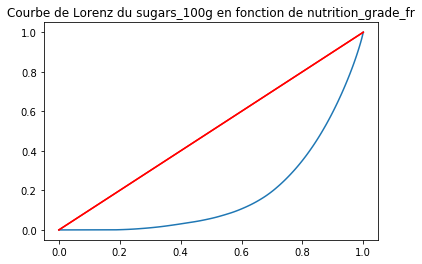

In [131]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du sugars_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['sugars_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de sucre ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


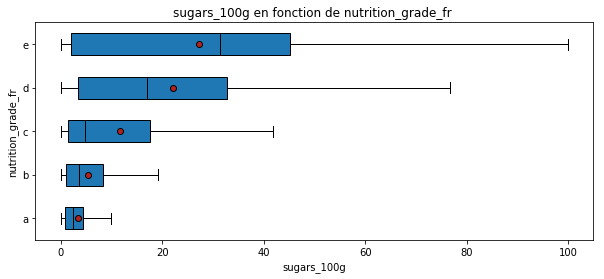

In [132]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('sugars_100g en fonction de nutrition_grade_fr ')
plt.xlabel('sugars_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['sugars_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [133]:
X = "Grade"   # qualitative
Y = "Sucre" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de Sucre et le grade est de", 
      eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['sugars_100g']))

Le rapport de corrélation entre la quantité de Sucre et le grade est de 0.21865546771049357


<span style="color:#3366ff"> <strong>Conclusion:</strong> La corrélation entre le grade est la quantité de sucre est faible.

### Visu / Corrélation: Grade / Saturated Fat

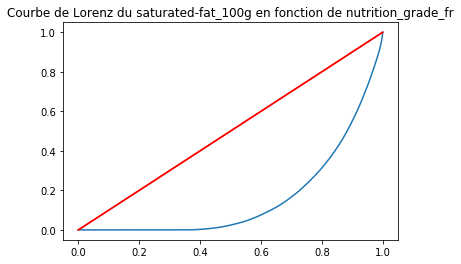

In [134]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du saturated-fat_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['saturated-fat_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de graisses saturées ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


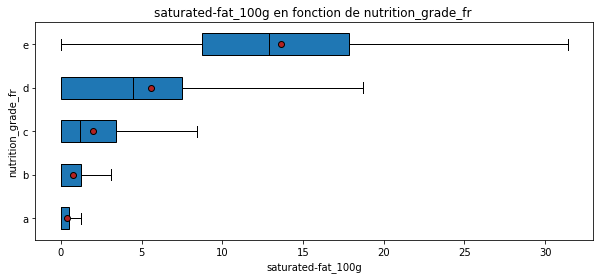

In [135]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('saturated-fat_100g en fonction de nutrition_grade_fr ')
plt.xlabel('saturated-fat_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['saturated-fat_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [136]:
X = "Grade"   # qualitative
Y = "Saturated Fat" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de graisse saturée et le grade est de", 
      eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['saturated-fat_100g']))

Le rapport de corrélation entre la quantité de graisse saturée et le grade est de 0.46010831317682455


<span style="color:#3366ff"> <strong>Conclusion: </strong> Comme la lecture du tableau de calcul du Grade le montre, il y a une correlation moyenne entre le grade et le taux de graisse saturée, plus la grade est élevé, plus le taux de graisse saturée est elevé.

### Visu / Corrélation: Grade / Fat

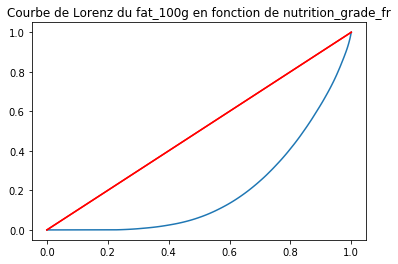

In [137]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du fat_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['fat_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de graisse ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


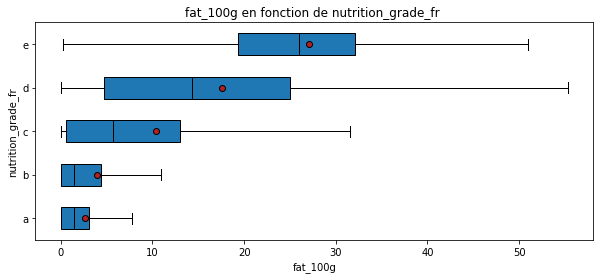

In [138]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('fat_100g en fonction de nutrition_grade_fr ')
plt.xlabel('fat_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['fat_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [139]:
X = "Grade"   # qualitative
Y = "Fat" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de graisse et le grade est de", eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['fat_100g']))

Le rapport de corrélation entre la quantité de graisse et le grade est de 0.30843102879096446


<span style="color:#3366ff"> <strong>Conclusion:</strong> Comme la lecture du tableau le montre, il y a une petite correlation entre le grade et le taux de graisse. Plus la quantité de graisse est elevé, plus la grade est élevé.

### Visu / Corrélation: Grade / Sel

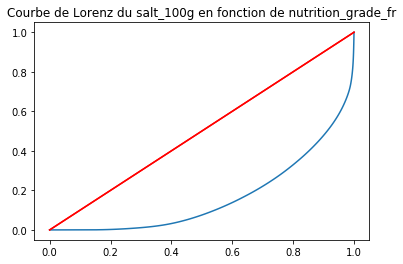

In [140]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du salt_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['salt_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de sel ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


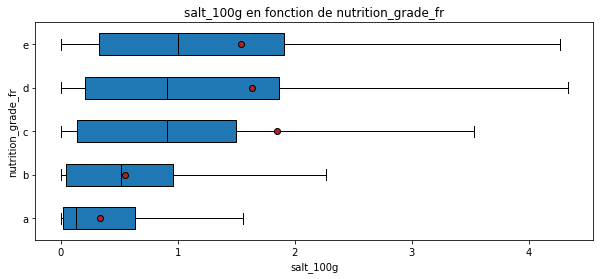

In [141]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('salt_100g en fonction de nutrition_grade_fr')
plt.xlabel('salt_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['salt_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [142]:
X = "Grade"   # qualitative
Y = "Sel" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de sel et le grade est de", eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['salt_100g']))

Le rapport de corrélation entre la quantité de sel et le grade est de 0.020469487465024028


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de correlation entre le grade et la quantité de sel.

### Visu / Corrélation: Grade / Energie

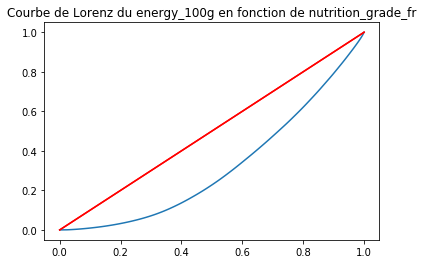

In [143]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du energy_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['energy_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> l'Energie est moyennement bien répartie sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


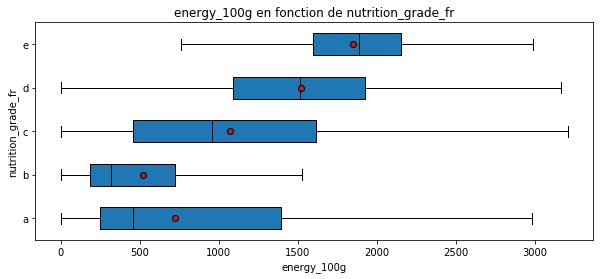

In [144]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('energy_100g en fonction de nutrition_grade_fr')
plt.xlabel('energy_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['energy_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [145]:
X = "Grade"   # qualitative
Y = "Energy" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre l'energie et le grade est de", eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['energy_100g']))

Le rapport de corrélation entre l'energie et le grade est de 0.38988616919195734


<span style="color:#3366ff"> <strong>Conclusion:</strong> il y a une correlation faible entre le grade et l'energie. 

### Visu / Corrélation: Grade / Protéines

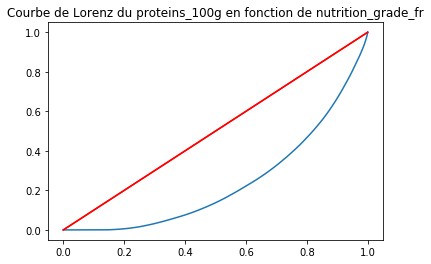

In [146]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du proteins_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['proteins_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de protéines ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


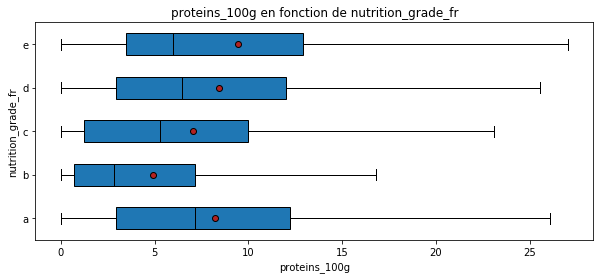

In [147]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('proteins_100g en fonction de nutrition_grade_fr')
plt.xlabel('proteins_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['proteins_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [148]:
X = "Grade"   # qualitative
Y = "Protèines" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de proteines et le grade est de", eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['proteins_100g']))

Le rapport de corrélation entre la quantité de proteines et le grade est de 0.03268854441066068


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité de protéine et le grade.

### Visu / Corrélation: Grade / Fibre

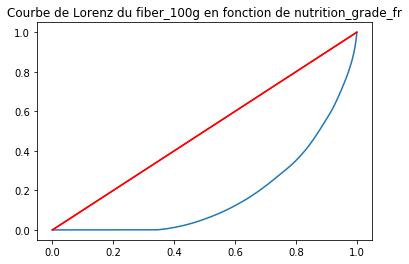

In [149]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du fiber_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['fiber_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de fibres ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


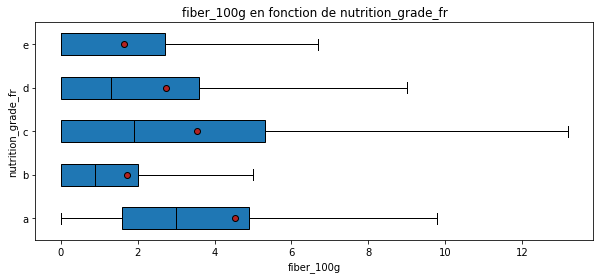

In [150]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('fiber_100g en fonction de nutrition_grade_fr')
plt.xlabel('fiber_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['fiber_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [151]:
X = "Grade"   # qualitative
Y = "Fiber" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de fibre et le grade est de", eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['fiber_100g']))

Le rapport de corrélation entre la quantité de fibre et le grade est de 0.05497519623642626


<span style="color:#3366ff"> <strong>Conclusion:</strong>  il n'y a pas de corrélation entre la quantité de sel et le grade.

### Visu / Corrélation: Grade / Huile de palme

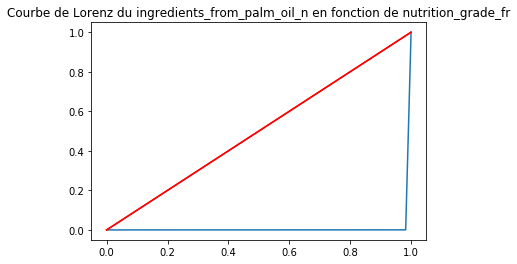

In [152]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du ingredients_from_palm_oil_n en fonction de nutrition_grade_fr')

suc = data_nutri_light['ingredients_from_palm_oil_n'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Les quantités "d'Ingredients issue de l'Huile de palme" sont très mal réparties sur l'ensemble des grades.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


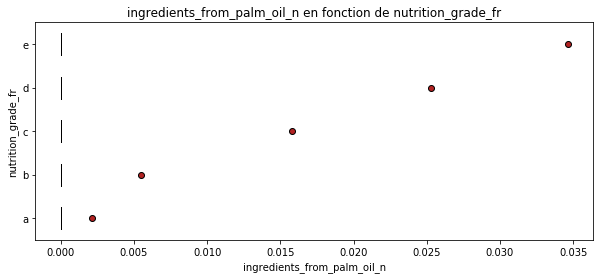

In [153]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('ingredients_from_palm_oil_n en fonction de nutrition_grade_fr')
plt.xlabel('ingredients_from_palm_oil_n')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['ingredients_from_palm_oil_n'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [154]:
X = "Grade"   # qualitative
Y = "Issue d'Huile de palme" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité d'huile de palme et le grade est de", 
      eta_squared(data_nutri_light['nutrition_grade_fr'],
      data_nutri_light['ingredients_from_palm_oil_n'])
     )

Le rapport de corrélation entre la quantité d'huile de palme et le grade est de 0.00756067726736393


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité d'ingredient issus de l'huile de palme et le grade.

### Visu / Corrélation: Grade / Ingredients peut etre issue de l'Huile de palme

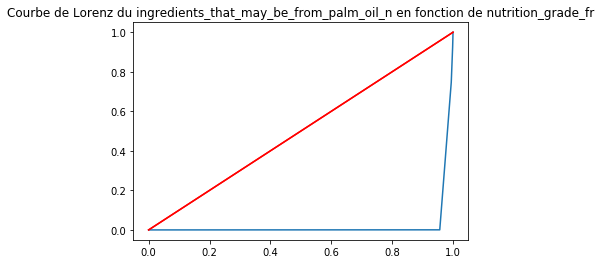

In [155]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du ingredients_that_may_be_from_palm_oil_n en fonction de nutrition_grade_fr')

suc = data_nutri_light['ingredients_that_may_be_from_palm_oil_n'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Les quantités "d'Ingredients peut etre issue de l'Huile de palme" sont très mal réparties sur l'ensemble des grades.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


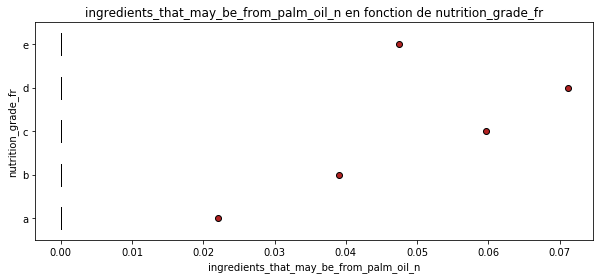

In [156]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('ingredients_that_may_be_from_palm_oil_n en fonction de nutrition_grade_fr')
plt.xlabel('ingredients_that_may_be_from_palm_oil_n')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['ingredients_that_may_be_from_palm_oil_n'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [157]:
X = "Grade"   # qualitative
Y = "Peut etre issue d'Huile de palme" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de dérivé d'huile de palme et le grade est de", 
      eta_squared(data_nutri_light['nutrition_grade_fr'],
      data_nutri_light['ingredients_that_may_be_from_palm_oil_n']))

Le rapport de corrélation entre la quantité de dérivé d'huile de palme et le grade est de 0.00462548734220319


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre la quantité d'ingredient peut être issus de l'huile de palme et le grade.

### Visu / Corrélation: Grade / Carbohydrates

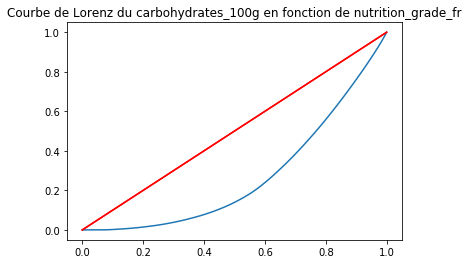

In [158]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du carbohydrates_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['carbohydrates_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de carbohydratets ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


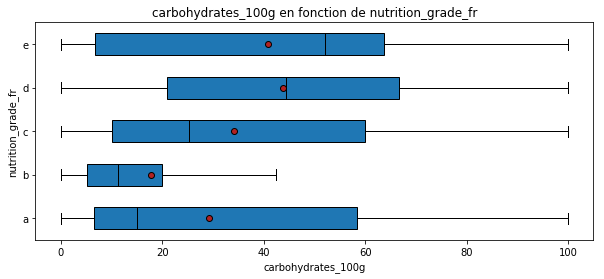

In [159]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('carbohydrates_100g en fonction de nutrition_grade_fr')
plt.xlabel('carbohydrates_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['carbohydrates_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [160]:
X = "Grade"   # qualitative
Y = "carbohydrates_100g" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de carbohydrates et le grade est de", 
      eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['carbohydrates_100g']))

Le rapport de corrélation entre la quantité de carbohydrates et le grade est de 0.10014838118754968


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n 'y a pas de corrélation entre la quantité de carbohydrates et le grade.

### Visu / Corrélation: Grade / Sodium

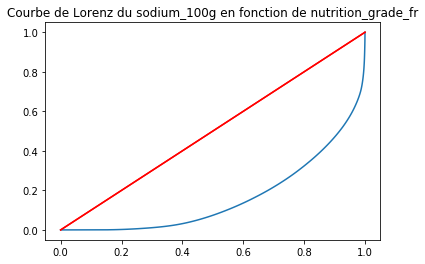

In [161]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du sodium_100g en fonction de nutrition_grade_fr')

suc = data_nutri_light['sodium_100g'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités de sel ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


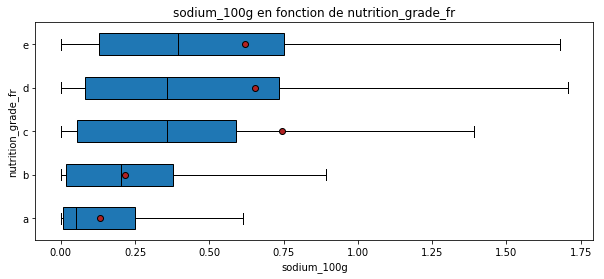

In [162]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('sodium_100g en fonction de nutrition_grade_fr')
plt.xlabel('sodium_100g')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['sodium_100g'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [163]:
X = "Grade"   # qualitative
Y = "Sodium" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la quantité de Sodium et le grade est de", 
      eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['sodium_100g']))

Le rapport de corrélation entre la quantité de Sodium et le grade est de 0.015015119108690854


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre le Grade et la quantité de sodium.

### Visu / Corrélation: Grade / Nb d'additifs

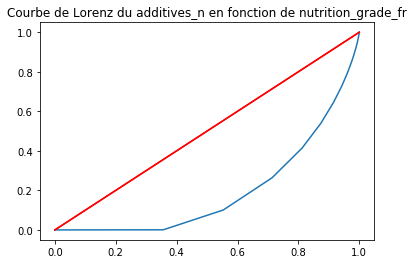

In [164]:
ax = plt.subplot()
ax.set_title('Courbe de Lorenz du additives_n en fonction de nutrition_grade_fr')

suc = data_nutri_light['additives_n'].values
lorenz = np.cumsum(np.sort(suc)) / suc.sum()
lorenz = np.append([0],lorenz) # La courbe commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(((0,0),(1,1)), "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> les quantités d'additifs ne sont pas réparties équitablement sur le grade.

c:\users\arnaud\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


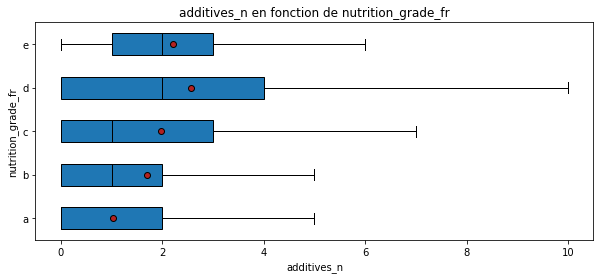

In [165]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('additives_n en fonction de nutrition_grade_fr')
plt.xlabel('additives_n')
plt.ylabel("nutrition_grade_fr")

groupes = []

grades = data_nutri_light['nutrition_grade_fr'].sort_values()
grades = grades.unique()
for m in grades:
    groupes.append(data_nutri_light[data_nutri_light['nutrition_grade_fr']==m]['additives_n'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=grades, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

In [166]:
X = "Grade"   # qualitative
Y = "Nb d'additifs" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre le Nb d'additifs et le grade est de", 
      eta_squared(data_nutri_light['nutrition_grade_fr'],data_nutri_light['additives_n']))

Le rapport de corrélation entre le Nb d'additifs et le grade est de 0.04318799429746101


<span style="color:#3366ff"> <strong>Conclusion:</strong> il n'y a pas de corrélation entre le nombre d'additif et le Grade.

### Tableau de Synthèse "Corrélations: Grade vs Params"

<span style="color:#3366ff"><table class="wikitable">
<tr>
<th>Produits</th>
<th>Corrélation avec le Grade</th> 
<th>Intérêt</th>
</tr>
<tr>
<td>Sugars</td>
<td>0.218</td>
<td>+</td>
</tr>
<tr>
<td>Saturated fat</td>
<td>0.460</td>
<td>++</td>
</tr>
<tr>
<td>Fat</td>
<td>0.308</td>
<td>+</td>
</tr>
<tr>
<td>Energy</td>
<td>0.389</td>
<td>+</td>
</tr>
<tr>
<td>Proteins</td>
<td>0.032</td>
<td>--</td>
</tr>
<tr>
<td>Fiber</td>
<td>0.054</td>
<td>--</td>
</tr>
<tr>
<td>Salt</td>
<td>0.020</td>
<td>--</td>    
</tr>
<tr>
<td>Nb From Palm Oil</td>
<td>0.004</td>
<td>--</td>
</tr>    
<tr>
<td>Nb Maybe From Palm Oil</td>
<td>0.007</td>
<td>--</td>
</tr>
<tr>
<td>Carbohydrates</td>
<td>0.100</td>
<td>-</td>
</tr> 
<tr>
<td>Sodium</td>
<td>0.015</td>
<td>--</td>
</tr> 
<tr>
<td>Nb d'Additifs</td>
<td>0.043</td>
<td>--</td>
</tr>       
<tr>
</table>

<span style="color:#3366ff">  Seuls les paramètres avec de bonnes corrélations seront conservés pour la phase de machine learning: "sugars_100g", "saturated-fat_100g", "fat_100g", & "energy_100g".

# Fusion de paramètres 1

<span style="color:#3366ff"> Les deux paramètres <strong> 'ingredients_from_palm_oil_n' </strong> et <strong> 'ingredients_that_may_be_from_palm_oil_n' </strong> ont de faibles corrélations avec le Score et le Grade, mais peut être qu'une variable issue de la fusion de ces deux paramètres à plus d'intérêt.
    
    
<span style="color:#3366ff"> Création du nouveau paramètre <strong>data_nutri_light['Presence_Palm_Oil']</strong> , issu de l'operator OR/OU.

<table class="wikitable" style="float:left;">
<tr style="background:#def; text-align:center;">
</tr>
<tr bgcolor="#DDEEFF" align="center">
<td>A</td>
<td>B</td>
<td>A OR B</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>

In [167]:
data_nutri_light['Presence_Palm_Oil'] = operator.or_(
    data_nutri_light['ingredients_from_palm_oil_n']!=0, 
    data_nutri_light['ingredients_that_may_be_from_palm_oil_n']!=0
    )
data_nutri_light['Presence_Palm_Oil'].describe()

count     170540
unique         2
top        False
freq      161014
Name: Presence_Palm_Oil, dtype: object

### Corrélation Score (Quanti) / Présence huile de palme (Quali): Calcul de Eta²

In [168]:
X = "Presence_Palm_Oil"   # qualitative
Y = "Score"               # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la présence d'huile de palme et le Score est de", 
      eta_squared(data_nutri_light['Presence_Palm_Oil'],
      data_nutri_light['nutrition-score-fr_100g'])
     )

Le rapport de corrélation entre la présence d'huile de palme et le Score est de 0.006312208913865116


<span style="color:#3366ff"> <strong>Conclusion:</strong> la corrélation entre cette nouvelle variable et le Score est nulle.

### Corrélation Grade (Quali) Vs Présence huile de palme (Quali): Chi2

In [169]:
X = "Presence_Palm_Oil"
Y = "nutrition_grade_fr"

# Cont pour tableau de contingence
c = data_nutri_light[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = data_nutri_light[X].value_counts()
ty = data_nutri_light[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data_nutri_light)
cont

nutrition_grade_fr,a,b,c,d,e,Total
Presence_Palm_Oil,,,,,,
False,29899.0,25610.0,33008.0,43239.0,29258.0,161014.0
True,603.0,1029.0,2236.0,3522.0,2136.0,9526.0
total,30502.0,26639.0,35244.0,46761.0,31394.0,170540.0


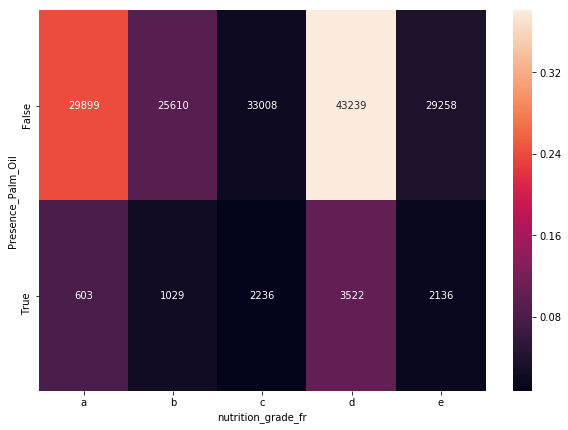

In [170]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)

tx.columns = ["foo"]
ty.columns = ["foo"]

n = len(data_nutri_light)
#indep = tx.dot(ty.T)/ n
indep = np.dot(tx,ty.T)/ n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()

fig, ax = plt.subplots(figsize=(10,7)) 
sea.heatmap(mesure/xi_n,annot=c, fmt="d")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> la correlation estla plus forte pour le Grade D.

# Fusion de paramètres 2

<span style="color:#3366ff"> Le paramètre "additives_n" va être fusionné de la même manière (operator OR) avec le paramètre précédemment crée "Presence_Palm_Oil" pour donner "Presence_Add" 

In [171]:
data_nutri_light['Presence_Add'] = operator.or_(
    data_nutri_light['Presence_Palm_Oil']!=0, 
    data_nutri_light['additives_n']!=0
    )
data_nutri_light['Presence_Add'].describe()

count     170540
unique         2
top         True
freq      110576
Name: Presence_Add, dtype: object

In [172]:
X = "Presence_Add"   # qualitative
Y = "Score"               # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Le rapport de corrélation entre la présence d'additifs / huile de palme et le Score est de", 
      eta_squared(data_nutri_light['Presence_Add'],
      data_nutri_light['nutrition-score-fr_100g'])
     )

Le rapport de corrélation entre la présence d'additifs / huile de palme et le Score est de 0.06539967805156498


In [173]:
X = "Presence_Add"
Y = "nutrition_grade_fr"

# Cont pour tableau de contingence
c = data_nutri_light[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = data_nutri_light[X].value_counts()
ty = data_nutri_light[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data_nutri_light)
cont

nutrition_grade_fr,a,b,c,d,e,Total
Presence_Add,,,,,,
False,17680.0,10642.0,12620.0,12521.0,6501.0,59964.0
True,12822.0,15997.0,22624.0,34240.0,24893.0,110576.0
total,30502.0,26639.0,35244.0,46761.0,31394.0,170540.0


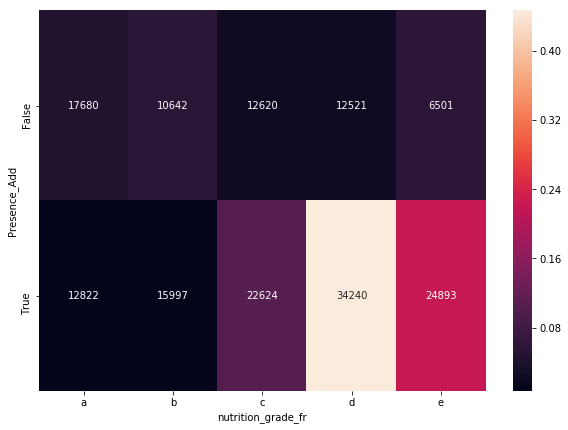

In [174]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)

tx.columns = ["foo"]
ty.columns = ["foo"]

n = len(data_nutri_light)
#indep = tx.dot(ty.T)/ n
indep = np.dot(tx,ty.T)/ n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()

fig, ax = plt.subplots(figsize=(10,7)) 
sea.heatmap(mesure/xi_n,annot=c, fmt="d")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> la plus forte corrélation de cette nouvelle variable est pour le Grade D.

# Regression linéaire pour determiner les scores manquants 

## Def reg

In [175]:
regr = linear_model.LinearRegression()

## Reg Lin: Score / Sucre

In [176]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['sugars_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x Sucre) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.227269 x Sucre) + 5.401124


In [177]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.23454914659576065

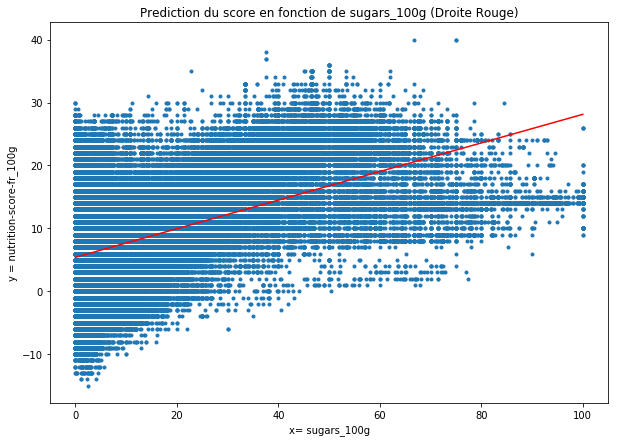

In [178]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['sugars_100g'])
min_x = min(data_nutri_light['sugars_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de sugars_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= sugars_100g")

plt.plot(data_nutri_light['sugars_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")

plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette régression linéaire est de 0.23.

## Reg Lin: Score / Saturated Fat

In [179]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['saturated-fat_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x SatFat) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.847554 x SatFat) + 4.871718


In [180]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.43112953861039804

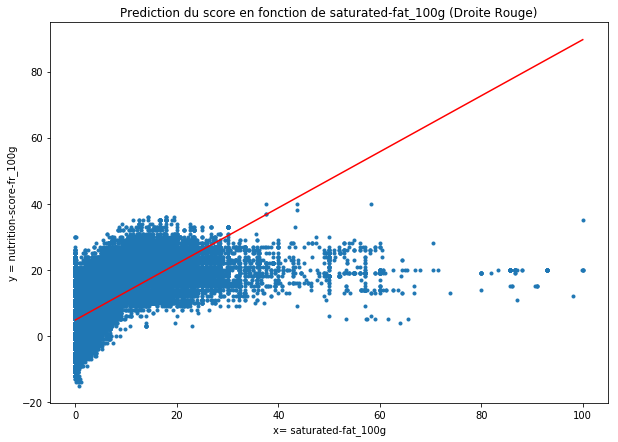

In [181]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['saturated-fat_100g'])
min_x = min(data_nutri_light['saturated-fat_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de saturated-fat_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= saturated-fat_100g")

plt.plot(data_nutri_light['saturated-fat_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette régression linéaire est de 0.43.

## Reg Lin: Score / Fat

In [182]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['fat_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x Fat) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.332798 x Fat) + 4.453748


In [183]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.32668527348758947

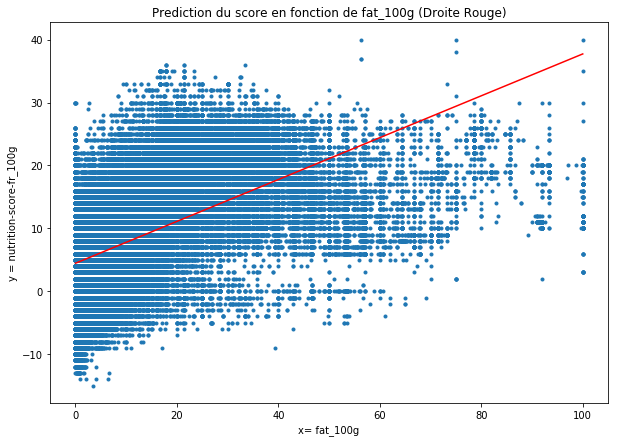

In [184]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['fat_100g'])
min_x = min(data_nutri_light['fat_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de fat_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= fat_100g")

plt.plot(data_nutri_light['fat_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette régression linéaire est de 0.32 .

## Reg Lin: Score / Energy

In [185]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['energy_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x Energy) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.007580 x Energy) + -0.197997


In [186]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.39943613790084875

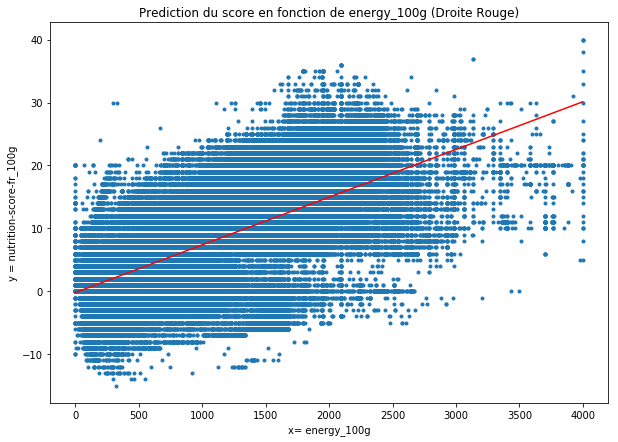

In [187]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['energy_100g'])
min_x = min(data_nutri_light['energy_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de energy_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= energy_100g")

plt.plot(data_nutri_light['energy_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette régression linéaire est de 0.39.

## Reg Lin: Score / Salt

In [188]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['salt_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x Salt) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.281864 x Salt) + 8.462774


In [189]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.012842828703375386

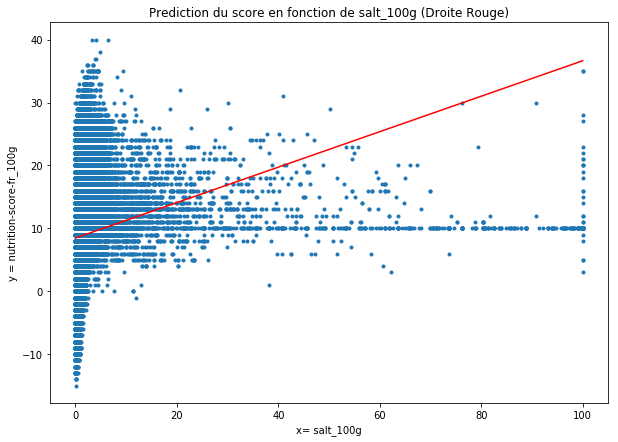

In [190]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['salt_100g'])
min_x = min(data_nutri_light['salt_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de salt_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= salt_100g")

plt.plot(data_nutri_light['salt_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette régression linéaire est de 0.01.

## Reg Lin: Score / Protèines

In [191]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['proteins_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x Proteins) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.128141 x Proteins) + 7.821151


In [192]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.012976149903123013

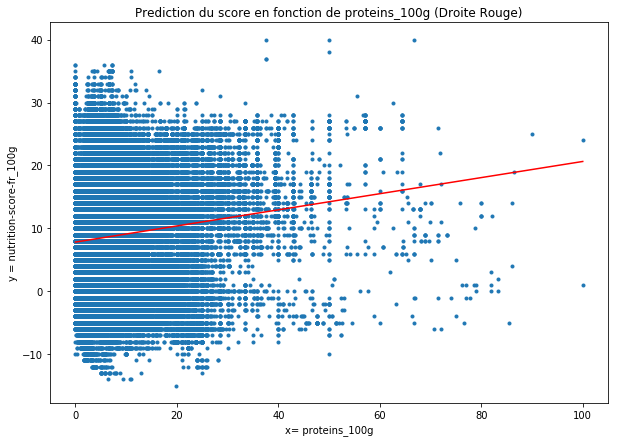

In [193]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['proteins_100g'])
min_x = min(data_nutri_light['proteins_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de proteins_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= proteins_100g")

plt.plot(data_nutri_light['proteins_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette régression linéaire est de 0.01.

## Reg Lin: Score / Palm Oil

In [194]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['ingredients_that_may_be_from_palm_oil_n']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x may_be_palm_oil) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (1.552724 x may_be_palm_oil) + 8.714808


In [195]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.0022616700750194285

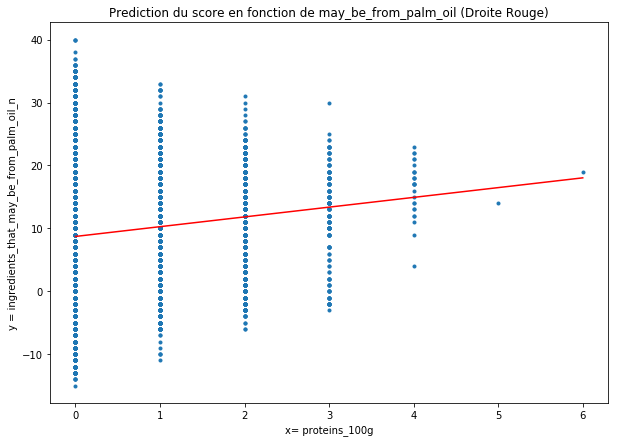

In [196]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['ingredients_that_may_be_from_palm_oil_n'])
min_x = min(data_nutri_light['ingredients_that_may_be_from_palm_oil_n'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de may_be_from_palm_oil (Droite Rouge)')
plt.ylabel("y = ingredients_that_may_be_from_palm_oil_n")
plt.xlabel("x= proteins_100g")

plt.plot(data_nutri_light['ingredients_that_may_be_from_palm_oil_n'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette régression linéaire est de 0.002

## Reg Lin: Score / Carbohydrates

In [197]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['carbohydrates_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x Carbs) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.085923 x Carbs) + 5.849925


In [198]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.07409637583304518

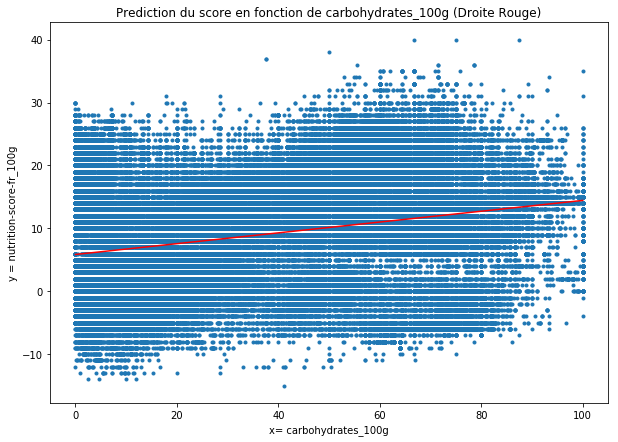

In [199]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['carbohydrates_100g'])
min_x = min(data_nutri_light['carbohydrates_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de carbohydrates_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= carbohydrates_100g")

plt.plot(data_nutri_light['carbohydrates_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Le score de cette regréssion liéaire est de 0.07 (nulle).

## Reg Lin: Score / Sodium

In [200]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), data_nutri_light['sodium_100g']]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X_train, y_train)

# formule de la droite de regression
print("Après le training on trouve, Score = (%f x Sodium) + %f" % (regr.coef_[0,1],regr.intercept_[0]))

Après le training on trouve, Score = (0.467299 x Sodium) + 8.554130


In [201]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.013125502597756578

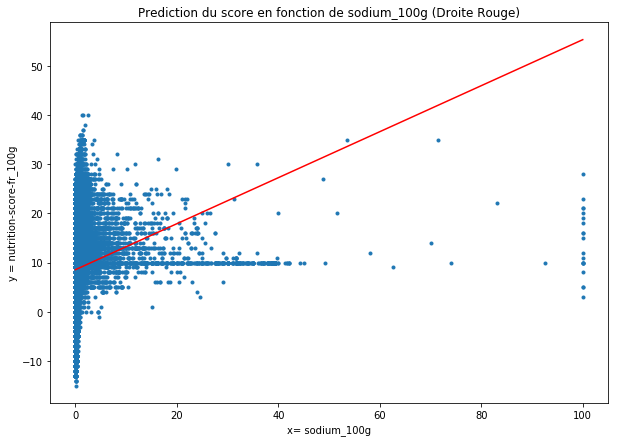

In [202]:
m = regr.coef_[0,1]
b = regr.intercept_[0]
max_x = max(data_nutri_light['sodium_100g'])
min_x = min(data_nutri_light['sodium_100g'])

plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.set_title('Prediction du score en fonction de sodium_100g (Droite Rouge)')
plt.ylabel("y = nutrition-score-fr_100g")
plt.xlabel("x= sodium_100g")

plt.plot(data_nutri_light['sodium_100g'], data_nutri_light['nutrition-score-fr_100g'], ".")

plt.plot([min_x, max_x], [b, m*max_x + b], "r")
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> le score de cette régréssion linéaire est de 0.012 (nulle).

# Reg Lin Multiparam: Score VS Sugars/SatFat/Fat/Energy

<span style="color:#3366ff"> Les paramètres avec la plus forte corrélation avec le Score ont été "agglomérés" pour la régression linéaire: 
    
<span style="color:#3366ff"> - sugars_100g, 
    
<span style="color:#3366ff"> - saturated-fat_100g, 
    
<span style="color:#3366ff"> - energy_100g. 
    
<span style="color:#3366ff"> Le paramètre fat_100g n'a pas été conservé à cause de sa relation linéaire avec saturated_fat_100g, et parce qu'il a une corrélation plus faible que ce paramètre avec le Score.

In [203]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]), 
               data_nutri_light['sugars_100g'],
               data_nutri_light['saturated-fat_100g'],
               data_nutri_light['energy_100g']
              ]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.6213213135721115

<span style="color:#3366ff"> <strong>Conclusion:</strong> cet algorithme de Regréssion Linéaire est celui qui permet le mieux de prédire le Score en fonction des paramètres 'sugars_100g', 'saturated-fat_100g', 'energy_100g'. 

<span style="color:#3366ff"> Son rendement est d'environ 62 %.

# Test Reg Lin Multiparam: Score VS SatFat/Energy

In [205]:
# Creation des matrices de travail
X = np.matrix([np.ones(data_nutri_light.shape[0]),             
               data_nutri_light['saturated-fat_100g'],
               data_nutri_light['energy_100g']
              ]).T
y = np.matrix(data_nutri_light['nutrition-score-fr_100g']).T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
prediction = regr.predict(X_test)
metri = metrics.r2_score(y_test, prediction)
metri

0.5270673530514935

<span style="color:#3366ff"> <strong>Conclusion:</strong> cet algorithme est moins bon que celui qui prend en compte le sucre.

## Conclusion Régression Linéaire

<span style="color:#3366ff"> <strong>Conclusion:</strong> l'algorithme de Regréssion Linéaire qui permet le mieux de prédire le Score est celui qui utlise les paramètres:
    
<span style="color:#3366ff">- sugars_100g,     
<span style="color:#3366ff">- saturated-fat_100g,     
<span style="color:#3366ff">- energy_100g. 
    

<span style="color:#3366ff"> Son rendement est de 62.9 %.

# kNN pour determiner les grades manquants 

In [207]:
data_nutri_light_train, data_nutri_light_test = train_test_split(data_nutri_light, train_size=0.8, test_size=0.2)

## kNN: Grade / Saturated Fat

In [208]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['saturated-fat_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['saturated-fat_100g']]).T

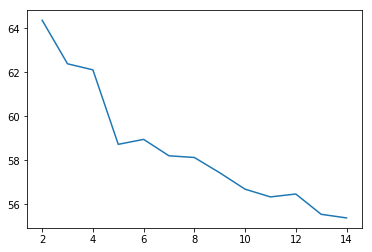

In [209]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [210]:
mini = min(error)
mini

55.37410578163481

<span style="color:#3366ff">Conclusion: l'erreur la plus faible est d'environ 54% pour une valeur de "k" de 11 (contre une erreur de 62% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul.

<span style="color:#3366ff"> 
--> Algorithme pas optimisé. 

## kNN: Grade / Fat

In [211]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['fat_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['fat_100g']]).T

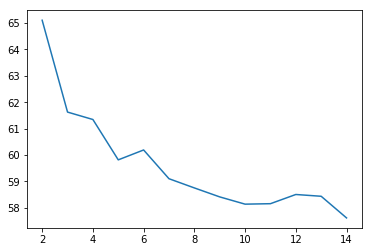

In [212]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [213]:
mini = min(error)
mini

57.61111762636332

<span style="color:#3366ff">  Conclusion: l'erreur la plus faible est d'environ 57% pour une valeur de "k" de 12 (contre une erreur de 66% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul.
    
  
<span style="color:#3366ff"> 
--> Algorithme pas optimisé. 

## kNN: Grade / Sugar

In [214]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['sugars_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['sugars_100g']]).T

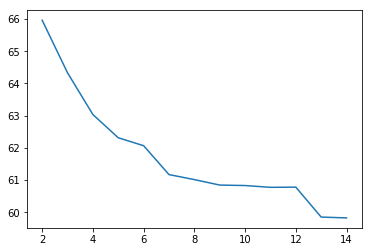

In [215]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [216]:
mini = min(error)
mini

59.82174269965989

<span style="color:#3366ff">  Conclusion: l'erreur la plus faible est d'environ 59% pour une valeur de "k" de 14 (contre une erreur de 66% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul.

<span style="color:#3366ff"> 
--> Algorithme pas optimisé. 

## kNN: Grade / Sel

In [217]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['salt_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['salt_100g']]).T

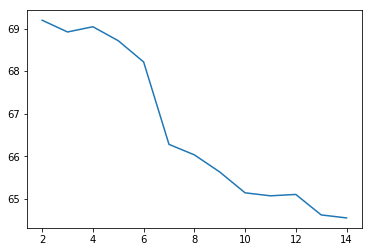

In [218]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [219]:
mini = min(error)
mini

64.55377037645127

<span style="color:#3366ff">  Conclusion: l'erreur la plus faible est d'environ 66% pour une valeur de "k" de 13 (contre une erreur de 70% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul. 
    
<span style="color:#3366ff"> 
--> Algorithme pas optimisé. 

## kNN: Grade / Protèines

In [220]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['proteins_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['proteins_100g']]).T

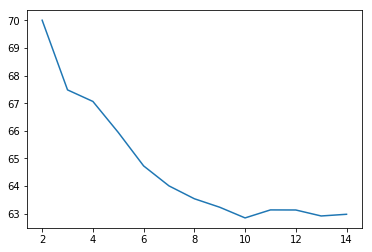

In [221]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [222]:
mini = min(error)
mini

62.84156209686878

<span style="color:#3366ff">  Conclusion: l'erreur la plus faible est d'environ 62% pour une valeur de "k" de 14 (contre une erreur de 70% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul.

<span style="color:#3366ff"> 
--> Algorithme pas optimisé. 

## kNN: Grade / Energy

In [223]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['energy_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['energy_100g']]).T

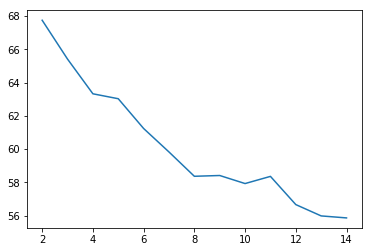

In [224]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [225]:
mini = min(error)
mini

55.86959071185645

<span style="color:#3366ff">  Conclusion: l'erreur la plus faible est d'environ 56% pour une valeur de "k" de 13 (contre une erreur de 60% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul.

<span style="color:#3366ff"> 
--> Algorithme pas optimisé. 

## kNN: Grade / Palm Oil

In [226]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['ingredients_that_may_be_from_palm_oil_n']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['ingredients_that_may_be_from_palm_oil_n']]).T

krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

<span style="color:#3366ff">  Conclusion: comme l'analyse précédante le laissait présager, l'algorithm n'est pas du tout adapté. L'erreur la plus faible est d'environ 81% pour une valeur de "k" de 6 (contre une erreur de 82% pour k=2). C'est une erreur très élevée pour une valeur de k élevée qui peut demander du temps de calcul.  

<span style="color:#3366ff"> 
--> Algorithme pas optimisé. 

## kNN: Grade / Carbohydrate

In [227]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['carbohydrates_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['carbohydrates_100g']]).T

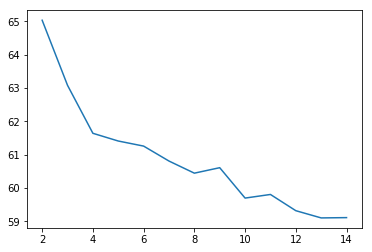

In [228]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [229]:
mini = min(error)
mini

59.10636800750557

<span style="color:#3366ff">  Conclusion: l'erreur la plus faible est d'environ 60% pour une valeur de "k" de 12 (contre une erreur de 68% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul.

<span style="color:#3366ff"> 
--> Algorithme pas optimisé.

## kNN: Grade / Sodium

In [230]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), data_nutri_light_train['sodium_100g']]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), data_nutri_light_test['sodium_100g']]).T

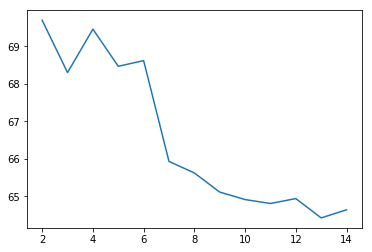

In [231]:
# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [232]:
mini = min(error)
mini

64.42770024627653

<span style="color:#3366ff">  Conclusion: l'erreur la plus faible est d'environ 67% pour une valeur de "k" de 14 (contre une erreur de 71% pour k=2). C'est une erreur élevée pour une valeur de k élevée qui peut demander du temps de calcul.

<span style="color:#3366ff"> 
--> Algorithme pas optimisé.

# kNN Multiparam: Grade VS Sugars/SatFat/Fat/Energy

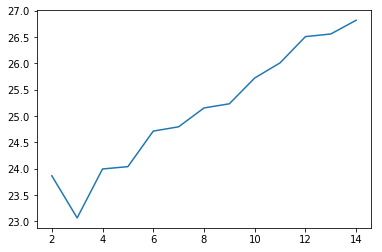

In [233]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), 
                    data_nutri_light_train['sugars_100g'],
                    data_nutri_light_train['saturated-fat_100g'],
                    data_nutri_light_train['energy_100g'],
                    data_nutri_light_train['salt_100g']
                    ]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), 
                   data_nutri_light_test['sugars_100g'],
                    data_nutri_light_test['saturated-fat_100g'],
                    data_nutri_light_test['energy_100g'],
                   data_nutri_light_test['salt_100g']
                    ]).T

# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [234]:
mini = min(error)
mini

23.067901958484814

<span style="color:#3366ff"> 
Conclusion: l'erreur la plus faible est d'environ 23% pour une valeur de "k" de 3. 
L'association de plusieurs paramètres permet un classement plus précis et plus rapide.

# Test comparatif: kNN Multiparam: Grade VS SatFat/Fat/Energy

<span style="color:#3366ff"> 
Essai sans le paramètre sucre.

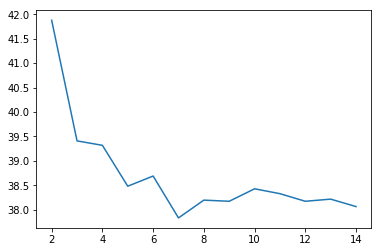

In [235]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), 
                    data_nutri_light_train['saturated-fat_100g'],
                    data_nutri_light_train['fat_100g'],
                    data_nutri_light_train['energy_100g'],
                    ]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), 
                    data_nutri_light_test['saturated-fat_100g'],
                    data_nutri_light_test['fat_100g'],
                    data_nutri_light_test['energy_100g'],
                    ]).T

# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [236]:
mini = min(error)
mini

37.8356983698839

<span style="color:#3366ff"> Conclusion: l'erreur la plus faible est de 38%, ce qui est moins que l'algorithme précédant.

# Test comparatif: kNN Multiparam: Grade VS All Param

<span style="color:#3366ff"> Test avec les paramètres suivants:
    

<span style="color:#3366ff"> - ingredients_from_palm_oil_n;     
<span style="color:#3366ff"> - ingredients_that_may_be_from_palm_oil_n;	
<span style="color:#3366ff"> - energy_100g;	
<span style="color:#3366ff"> - proteins_100g	
<span style="color:#3366ff"> - carbohydrates_100g    
<span style="color:#3366ff"> - sugars_100g   
<span style="color:#3366ff"> - fat_100g    
<span style="color:#3366ff"> - saturated-fat_100g    
<span style="color:#3366ff"> - fiber_100g    
<span style="color:#3366ff"> - salt_100g    
<span style="color:#3366ff"> - sodium_100g   
<span style="color:#3366ff"> - additives_n'

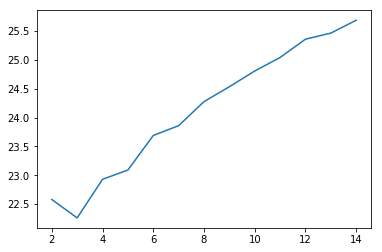

In [237]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), 
                    data_nutri_light_train['sugars_100g'],
                    data_nutri_light_train['fat_100g'],
                    data_nutri_light_train['saturated-fat_100g'],
                    data_nutri_light_train['energy_100g'],
                    data_nutri_light_train['salt_100g'],                   
                    data_nutri_light_train['fiber_100g'],
                    data_nutri_light_train['ingredients_from_palm_oil_n'],
                    data_nutri_light_train['ingredients_that_may_be_from_palm_oil_n'],
                    data_nutri_light_train['proteins_100g'],
                    data_nutri_light_train['carbohydrates_100g'],   
                    data_nutri_light_train['sodium_100g'],
                    data_nutri_light_train['additives_n']
                    ]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), 
                   data_nutri_light_test['sugars_100g'],
                   data_nutri_light_test['fat_100g'],
                   data_nutri_light_test['saturated-fat_100g'],
                   data_nutri_light_test['energy_100g'],
                   data_nutri_light_test['salt_100g'],                 
                   data_nutri_light_test['fiber_100g'],
                   data_nutri_light_test['ingredients_from_palm_oil_n'],
                   data_nutri_light_test['ingredients_that_may_be_from_palm_oil_n'],
                   data_nutri_light_test['proteins_100g'],
                   data_nutri_light_test['carbohydrates_100g'],
                   data_nutri_light_test['sodium_100g'],
                   data_nutri_light_test['additives_n']
                   ]).T

# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [238]:
mini = min(error)
mini

22.261639498064966

<span style="color:#3366ff"> Conclusion: l'erreur la plus faible est d'environ 22%.

# Test comparatif: kNN Multiparam: Grade VS AllParam LIGHT

<span style="color:#3366ff"> Test avec les paramètres suivants (les relations linéaires ont été retirées, ainsi que les paramètres avec de faibles corrélation avec le Grade):


<span style="color:#3366ff"> - energy_100g	
<span style="color:#3366ff"> - proteins_100g	   
<span style="color:#3366ff"> - sugars_100g        
<span style="color:#3366ff"> - saturated-fat_100g     
<span style="color:#3366ff"> - fiber_100g    
<span style="color:#3366ff"> - salt_100g

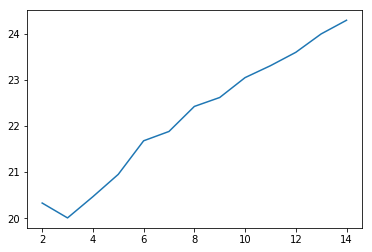

In [239]:
ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), 
                    data_nutri_light_train['sugars_100g'],
                    #data_nutri_light_train['fat_100g'],
                    data_nutri_light_train['saturated-fat_100g'],
                    data_nutri_light_train['energy_100g'],
                    data_nutri_light_train['salt_100g'],                   
                    data_nutri_light_train['fiber_100g'],
                    #data_nutri_light_train['ingredients_from_palm_oil_n'],
                    #data_nutri_light_train['ingredients_that_may_be_from_palm_oil_n'],
                    data_nutri_light_train['proteins_100g'],
                    #data_nutri_light_train['carbohydrates_100g'],   
                    #data_nutri_light_train['sodium_100g']
                    #data_nutri_light_train['additives_n']
                    ]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), 
                   data_nutri_light_test['sugars_100g'],
                   #data_nutri_light_test['fat_100g'],
                   data_nutri_light_test['saturated-fat_100g'],
                   data_nutri_light_test['energy_100g'],
                   data_nutri_light_test['salt_100g'],                 
                   data_nutri_light_test['fiber_100g'],
                   #data_nutri_light_test['ingredients_from_palm_oil_n'],
                   #data_nutri_light_test['ingredients_that_may_be_from_palm_oil_n'],
                   data_nutri_light_test['proteins_100g'],
                   #data_nutri_light_test['carbohydrates_100g'],
                   #data_nutri_light_test['sodium_100g']
                   #data_nutri_light_test['additives_n']
                   ]).T

# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [240]:
mini = min(error)
mini

20.007036472381845

<span style="color:#3366ff"> <strong>Conclusion:</strong> l'erreur la plus faible est d'environ 20% pour k=3.

# Test comparatif: kNN Multiparam: Grade VS AllParam LIGHT V2

<span style="color:#3366ff"> Test avec la variable issus de la fusion de ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n & additives_n --> <strong> Presence_Add </strong> 

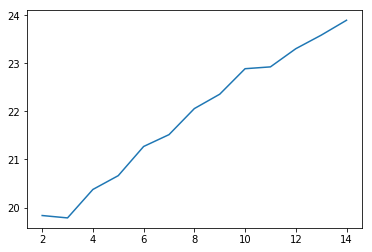

In [241]:

ytrain = data_nutri_light_train['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light_train.shape[0]), 
                    data_nutri_light_train['sugars_100g'],
                    data_nutri_light_train['saturated-fat_100g'],
                    data_nutri_light_train['energy_100g'],
                    data_nutri_light_train['salt_100g'],                   
                    data_nutri_light_train['fiber_100g'],
                    #data_nutri_light_train['proteins_100g'],
                    data_nutri_light_train['Presence_Add']
                    ]).T

ytest = data_nutri_light_test['nutrition_grade_fr']
xtest = np.matrix([np.ones(data_nutri_light_test.shape[0]), 
                   data_nutri_light_test['sugars_100g'],
                   data_nutri_light_test['saturated-fat_100g'],
                   data_nutri_light_test['energy_100g'],
                   data_nutri_light_test['salt_100g'],                 
                   data_nutri_light_test['fiber_100g'],
                   #data_nutri_light_test['proteins_100g'],
                   data_nutri_light_test['Presence_Add']
                   ]).T

# Recherche du K ideal
krange = range(2,15)
error=[]
for k in krange:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    error.append(100*(1 - (knn.score(xtest, ytest))))
    
plt.plot(krange, error)

In [242]:
mini = min(error)
mini

19.784214846956726

<span style="color:#3366ff"> <strong>Conclusion:</strong> Avec moins de 20 % (environ 19.8% pour k = 3) ce en fait l'algo le plus efficace.

# Conclusion Feature Engineering

<span style="color:#3366ff"><table class="wikitable">
<tr>
<th>Paramètres</th>
<th>Rendement Rég Lin pour le Score</th>
<th>Rendement kNN pour le Grade</th> 
</tr>
<tr>
<td>Sugars</td>
<td>0.229</td>
<td>0.4</td>
</tr>
<tr>
<td>Saturated fat</td>
<td>0.429</td>
<td>0.46</td>
</tr>
<tr>
<td>Fat</td>
<td>0.329</td>
<td>0.43</td>
</tr>
<tr>
<td>Energy</td>
<td>0.391</td>
<td>0.44</td>
</tr>
<tr>
<td>Proteins</td>
<td>0.401</td>
<td>0.38</td>
</tr>
<tr>
<td>Salt</td>
<td>0.016</td>
<td>0.34</td>
</tr>
<tr>
<td>From Palm Oil</td>
<td>0.00</td>
<td>0.18</td>
</tr>
<tr>
<td>Sugars/SatFat/Fat/Energy</td>
<td>0.629</td>
<td>0.77</td>
</tr>
<tr>
<td>SatFat/Fat/Energy</td>
<td>0.419</td>
<td>0.62</td>
</tr>   
<tr>
<td>Full Param</td>
<td>na</td>
<td>0.78</td>
</tr>
<tr>
<td>Full Param LIGHT</td>
<td>na</td>
<td>0.8</td>
</tr>
<tr>
<td>Full Param LIGHT V2</td>
<td>na</td>
<td>0.82</td>
</tr>
</table>

<span style="color:#3366ff"> <strong>Conclusion: </strong> L'algorithme de Machine Learning qui fonctionne le mieux (rendement d'environ 82%) est le kNN k=3 avec les paramètres suivants:
    
<span style="color:#3366ff"> - energy_100g	
  
<span style="color:#3366ff"> - sugars_100g    
    
<span style="color:#3366ff"> - saturated-fat_100g
    
<span style="color:#3366ff"> - fiber_100g
    
<span style="color:#3366ff"> - salt_100g
    
<span style="color:#3366ff"> - Presence_Add (variable construite) 

# kNN: Calcul des Grades manquants dans la base d'origine

In [243]:
data_nutri_TEST = pd.read_csv(
    'Data_Food_TEST.csv', 
    sep='\t', 
    encoding='utf-8', 
    low_memory = False)
pd.options.display.max_columns=50
data_nutri_TEST.head().T

,0,1,2,3,4
code,70662030332,735375603258,2000000022557,20258207,2427222440410
product_name,Cup Noodles Chicken Flavor,Instant Noodles Soup - Vegetable Flavor,Bouillon cube légumes sans sel,Purée,Mousline
additives_n,12,11,0,5,1
ingredients_from_palm_oil_n,0,1,0,1,0
ingredients_that_may_be_from_palm_oil_n,0,0,0,1,1
nutrition_grade_fr,NaN,NaN,NaN,NaN,NaN
energy_100g,1830,1866,2151,1490,703
proteins_100g,10.9,9.23,6.6,7.5,7.4
carbohydrates_100g,62.5,55.38,49,76,75
sugars_100g,3.12,3.08,21,0.9,2.5


In [244]:
# On s'entraine sur la base sur laquelle les Grades sont renseignés "data_nutri_light"

ytrain = data_nutri_light['nutrition_grade_fr']
xtrain = np.matrix([np.ones(data_nutri_light.shape[0]), 
                    data_nutri_light['sugars_100g'],
                    data_nutri_light['saturated-fat_100g'],
                    data_nutri_light['energy_100g'],
                    data_nutri_light['salt_100g'],                   
                    data_nutri_light['fiber_100g'],                    
                    data_nutri_light['proteins_100g'], 
                    data_nutri_light['Presence_Add'], 
                    ]).T

#Creation des variables fusionnées

data_nutri_TEST['Presence_Palm_Oil'] = operator.or_(
    data_nutri_TEST['ingredients_from_palm_oil_n']!=0, 
    data_nutri_TEST['ingredients_that_may_be_from_palm_oil_n']!=0
    )

data_nutri_TEST['Presence_Add'] = operator.or_(
    data_nutri_TEST['Presence_Palm_Oil']!=0, 
    data_nutri_TEST['additives_n']!=0
    )


xtest = np.matrix([np.ones(data_nutri_TEST.shape[0]), 
                    data_nutri_TEST['sugars_100g'],
                    data_nutri_TEST['saturated-fat_100g'],
                    data_nutri_TEST['energy_100g'],
                    data_nutri_TEST['salt_100g'],                   
                    data_nutri_TEST['fiber_100g'],                    
                    data_nutri_TEST['proteins_100g'],  
                    data_nutri_TEST['Presence_Add'], 
                    ]).T

# Recherche du K ideal

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
    
data_nutri_TEST['nutrition_grade_fr'] = knn.predict(xtest)

In [245]:
predict_grade_TEST = pd.DataFrame(data_nutri_TEST, columns=['code', 'product_name', 'nutrition_grade_fr'])
predict_grade_TEST

,code,product_name,nutrition_grade_fr
0,70662030332,Cup Noodles Chicken Flavor,d
1,735375603258,Instant Noodles Soup - Vegetable Flavor,e
2,2000000022557,Bouillon cube légumes sans sel,d
3,20258207,Purée,a
4,2427222440410,Mousline,a
5,26021836,Velouté de légumes,b
6,3011360005557,"Bouquet Garni thym,persil,laurier",e
7,3011360005564,Court-Bouillon Fines herbes et vin blanc (9 Ta...,d
8,3011360006042,Soupe paysanne aux légumes cuisinée au lard,c
9,3011360006233,Soupe à l'Oignon,c


<span style="color:#3366ff"> Rappel: l'algo kNN calcul des grades avec un rendement d'environ 82%.

# CONCLUSION

<span style="color:#3366ff"> Afin de pouvoir prédire la qualité nutritionnelle d'un aliment, sa description doit être la plus complète et la plus cohérente possible (valeur min et max).


<span style="color:#3366ff"> Si le Grade n'a pu être calculé, l'algorithmes de Machine Learning le plus performant (82%) pour prédire la valeur nutritionnelle (via le Grade) de tous les aliments est un 3NN avec comme paramètres:

<span style="color:#3366ff"> - energy_100g	
   
<span style="color:#3366ff"> - sugars_100g    
    
<span style="color:#3366ff"> - saturated-fat_100g
    
<span style="color:#3366ff"> - fiber_100g
    
<span style="color:#3366ff"> - salt_100g
    
<span style="color:#3366ff"> - Presence_Add (variable construite)   
    
<span style="color:#3366ff"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -     

<span style="color:#3366ff"> <strong> Remarques: </strong>
 
<span style="color:#3366ff"> Ces algorithmes ne prennent pas en compte la différence entre les liquides et les solides.


<span style="color:#3366ff"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

<span style="color:#3366ff"> <strong> Rappel: </strong>
    
<span style="color:#3366ff"> Relation Score & Grade
 
 
<span style="color:#3366ff">Aliments solides :

<span style="color:#3366ff">A - Vert : de -15 à -2
    
<span style="color:#3366ff">B - Jaune : de -1 à 3
    
<span style="color:#3366ff">C - Orange : de 4 à 11
    
<span style="color:#3366ff">D - Rose : de 12 à 16
    
<span style="color:#3366ff">E - Rouge : 17 à 40
    


<span style="color:#3366ff">Boissons :

<span style="color:#3366ff">A - Vert : de -15 à 0
    
<span style="color:#3366ff">B - Jaune : de 1 à 4
    
<span style="color:#3366ff">C - Orange : de 5 à 8
    
<span style="color:#3366ff">D - Rose : de 9 à 11
    
<span style="color:#3366ff">E - Rouge : 12 à 40

<span style="color:#009900"> <strong>Difficultées rencontrées: </strong>
 
<span style="color:#009900"> - l'exploitation des boxplots;
    
<span style="color:#009900"> - tracés de certains boxplots (grades vs params); 
    
<span style="color:#009900"> - heatmap: analyse du rendu pour un très grand nombre de paramètres;
    
<span style="color:#009900"> - le choix des paramètres du kNN qui va à l'encontre de l'analyse bivariée.   